# AutoGluon Tabular - Quick Start

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/autogluon/autogluon/blob/stable/docs/tutorials/tabular/tabular-quick-start.ipynb)
[![Open In SageMaker Studio Lab](https://studiolab.sagemaker.aws/studiolab.svg)](https://studiolab.sagemaker.aws/import/github/autogluon/autogluon/blob/stable/docs/tutorials/tabular/tabular-quick-start.ipynb)

In this tutorial, we will see how to use AutoGluon's `TabularPredictor` to predict the values of a target column based on the other columns in a tabular dataset.

Begin by making sure AutoGluon is installed, and then import AutoGluon's `TabularDataset` and `TabularPredictor`. We will use the former to load data and the latter to train models and make predictions.

In [2]:
!python -m pip install --upgrade pip
!python -m pip install autogluon

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 18.1 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of openxlab to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of openxlab to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 33.3 MB/s eta 0:00:00

In [3]:
from autogluon.tabular import TabularDataset, TabularPredictor

## Example Data

For this tutorial we will use a dataset from the cover story of [Nature issue 7887](https://www.nature.com/nature/volumes/600/issues/7887): [AI-guided intuition for math theorems](https://www.nature.com/articles/s41586-021-04086-x.pdf). The goal is to predict a knot's signature based on its properties. We sampled 10K training and 5K test examples from the [original data](https://github.com/deepmind/mathematics_conjectures/blob/main/knot_theory.ipynb). The sampled dataset make this tutorial run quickly, but AutoGluon can handle the full dataset if desired.

We load this dataset directly from a URL. AutoGluon's `TabularDataset` is a subclass of pandas [DataFrame](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html), so any `DataFrame` methods can be used on `TabularDataset` as well.

In [5]:
import pandas as pd
from autogluon.tabular import TabularDataset
from google.colab import drive

drive.mount('/content/drive')

# Excel 파일을 pandas로 불러오기
file_path = '/content/drive/MyDrive/노인보호구역 프로젝트/p프_전체계획.xlsx'
df = pd.read_excel(file_path)

# TabularDataset에 전달
train_data = TabularDataset(df)

# 데이터 확인
train_data.head()


Mounted at /content/drive


,시간단위,격자명,인구수,경로당 수,복지시설 개수,보호지역 유무,과속단속카메라 개수,EPDO,사고수,EPDO 정규화,사고수 정규화,종속변수,종속,Unnamed: 13,인구수 정규화,경로당 정규화,복지시설 정규화,과속단속 정규화
0,2020.01~2020.06,ë¤ì¬6453,1776.0,2.0,1.0,0.0,3.0,23.0,1.0,0.048319,0.000000,0.014496,5.4,NaN,0.192499,0.250,0.0,0.103448
1,2020.01~2020.06,ë¤ì¬5651,2908.0,2.0,1.0,0.0,4.0,137.0,1.0,0.287815,0.000000,0.086345,28.2,NaN,0.315196,0.250,0.0,0.137931
2,2020.01~2020.06,ë¤ì¬6157,6798.0,4.0,1.0,0.0,3.0,127.0,2.0,0.266807,0.111111,0.157820,27.0,NaN,0.736831,0.500,0.0,0.103448
3,2020.01~2020.06,ë¤ì¬5858,5687.0,3.0,1.0,0.0,4.0,185.0,2.0,0.388655,0.111111,0.194374,38.6,NaN,0.616410,0.375,0.0,0.137931
4,2020.01~2020.06,ë¤ì¬5347,2394.0,2.0,1.0,0.0,1.0,57.0,1.0,0.119748,0.000000,0.035924,12.2,NaN,0.259484,0.250,0.0,0.034483


Our targets are stored in the "signature" column, which has 18 unique integers. Even though pandas didn't correctly recognize this data type as categorical, AutoGluon will fix this issue.


In [6]:
label = '종속'
train_data[label].describe()

,종속
count,4265.000000
mean,14.622884
std,14.263021
min,0.000000
25%,2.600000
50%,11.000000
75%,22.200000
max,96.000000


## Training

We now construct a `TabularPredictor` by specifying the label column name and then train on the dataset with `TabularPredictor.fit()`. We don't need to specify any other parameters. AutoGluon will recognize this is a multi-class classification task, perform automatic feature engineering, train multiple models, and then ensemble the models to create the final predictor.

In [12]:
predictor = TabularPredictor(label=label).fit(train_data)

No path specified. Models will be saved in: "AutogluonModels/ag-20241209_030230"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
Memory Avail:       11.12 GB / 12.67 GB (87.7%)
Disk Space Avail:   74.21 GB / 107.72 GB (68.9%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets. Defaulting to `'medium'`...
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='experimental' : New in v1.2: Pre-trained foundation model + parallel fits. The absolute best accuracy without consideration for inference speed. Does not support GPU.
	presets='best'         : Maximize accuracy. Recommended for most users. Use in competitions 

[1000]	valid_set's rmse: 0.705232
[2000]	valid_set's rmse: 0.682381
[3000]	valid_set's rmse: 0.666128
[4000]	valid_set's rmse: 0.659256
[5000]	valid_set's rmse: 0.65547
[6000]	valid_set's rmse: 0.650612
[7000]	valid_set's rmse: 0.646945
[8000]	valid_set's rmse: 0.644815
[9000]	valid_set's rmse: 0.642239
[10000]	valid_set's rmse: 0.641013


	-0.641	 = Validation score   (-root_mean_squared_error)
	17.09s	 = Training   runtime
	1.54s	 = Validation runtime
Fitting model: LightGBM ...
	-2.6998	 = Validation score   (-root_mean_squared_error)
	0.86s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: RandomForestMSE ...
	-0.5808	 = Validation score   (-root_mean_squared_error)
	4.64s	 = Training   runtime
	0.11s	 = Validation runtime
Fitting model: CatBoost ...
	-0.1659	 = Validation score   (-root_mean_squared_error)
	178.17s	 = Training   runtime
	0.03s	 = Validation runtime
Fitting model: ExtraTreesMSE ...
	-0.8264	 = Validation score   (-root_mean_squared_error)
	1.84s	 = Training   runtime
	0.12s	 = Validation runtime
Fitting model: NeuralNetFastAI ...
	-0.8916	 = Validation score   (-root_mean_squared_error)
	7.87s	 = Training   runtime
	0.05s	 = Validation runtime
Fitting model: XGBoost ...
	-2.6208	 = Validation score   (-root_mean_squared_error)
	2.05s	 = Training   runtime
	0.01s	 = Validation runtime


In [45]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score

hyperparameters = {
    'RF': {'num_trees': 50, 'max_depth': 5},  # Random Forest 모델에서 트리 수나 깊이를 줄여서 과적합을 방지
    'GBM': {'num_boost_round': 50, 'max_depth': 5},  # Gradient Boosting에서 학습을 더 적게 진행
    'NN': {'epochs': 5, 'batch_size': 32}  # Neural Network의 학습 epoch을 줄임
}

predictor = TabularPredictor(label=label).fit(train_data, hyperparameters=hyperparameters)


# 예측 수행
y_pred = predictor.predict(train_data.drop(columns=[label]))
y_true = train_data[label]

# 성능 지표 계산
rmse = mean_squared_error(y_true, y_pred, squared=False)  # RMSE
mae = mean_absolute_error(y_true, y_pred)               # MAE
r2 = r2_score(y_true, y_pred)                           # R²
mape = (abs((y_true - y_pred) / y_true).mean()) * 100   # MAPE (%)
explained_var = explained_variance_score(y_true, y_pred)  # Explained Variance

# 결과 출력
print("Model Performance Metrics:")
print(f"1. RMSE (Root Mean Squared Error): {rmse:.4f}")
print(f"2. MAE (Mean Absolute Error): {mae:.4f}")
print(f"3. R² (Coefficient of Determination): {r2:.4f}")
print(f"4. MAPE (Mean Absolute Percentage Error): {mape:.2f}%")
print(f"5. Explained Variance: {explained_var:.4f}")

No path specified. Models will be saved in: "AutogluonModels/ag-20241209_064814"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
Memory Avail:       10.59 GB / 12.67 GB (83.5%)
Disk Space Avail:   72.88 GB / 107.72 GB (67.7%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets. Defaulting to `'medium'`...
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='experimental' : New in v1.2: Pre-trained foundation model + parallel fits. The absolute best accuracy without consideration for inference speed. Does not support GPU.
	presets='best'         : Maximize accuracy. Recommended for most users. Use in competitions 

AssertionError: Unknown model type specified in hyperparameters: 'NN'. Valid model types: ['RF', 'XT', 'KNN', 'GBM', 'CAT', 'XGB', 'NN_TORCH', 'LR', 'FASTAI', 'TRANSF', 'AG_TEXT_NN', 'AG_IMAGE_NN', 'AG_AUTOMM', 'FT_TRANSFORMER', 'TABPFN', 'TABPFNMIX', 'FASTTEXT', 'ENS_WEIGHTED', 'SIMPLE_ENS_WEIGHTED', 'IM_RULEFIT', 'IM_GREEDYTREE', 'IM_FIGS', 'IM_HSTREE', 'IM_BOOSTEDRULES', 'VW', 'DUMMY']

In [14]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
import numpy as np
from autogluon.tabular import TabularPredictor

# 교차 검증 설정
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
metrics = {
    "RMSE": [],
    "MAE": [],
    "R²": [],
    "Explained Variance": []
}

# 데이터와 레이블 분리
X = train_data.drop(columns=[label])
y = train_data[label]

# 교차 검증 반복
for train_index, val_index in kfold.split(X):
    # 훈련/검증 데이터 분할
    train_fold = train_data.iloc[train_index]
    val_fold = train_data.iloc[val_index]

    # AutoGluon 훈련
    predictor = TabularPredictor(label=label).fit(train_fold, presets='medium', verbosity=0)

    # WeightedEnsemble_L2 모델로 예측
    y_val_true = val_fold[label]
    y_val_pred = predictor.predict(val_fold.drop(columns=[label]))

    # 성능 지표 계산
    metrics["RMSE"].append(mean_squared_error(y_val_true, y_val_pred, squared=False))
    metrics["MAE"].append(mean_absolute_error(y_val_true, y_val_pred))
    metrics["R²"].append(r2_score(y_val_true, y_val_pred))
    metrics["Explained Variance"].append(explained_variance_score(y_val_true, y_val_pred))

# 평균 성능 지표 출력
print("Cross-Validation Metrics:")
print(f"1. RMSE: {np.mean(metrics['RMSE']):.4f}")
print(f"2. MAE: {np.mean(metrics['MAE']):.4f}")
print(f"3. R²: {np.mean(metrics['R²']):.4f}")
print(f"4. Explained Variance: {np.mean(metrics['Explained Variance']):.4f}")


No path specified. Models will be saved in: "AutogluonModels/ag-20241209_031223"
Preset alias specified: 'medium' maps to 'medium_quality'.
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
No path specified. Models will be saved in: "AutogluonModels/ag-20241209_031639"
Preset alias specified: 'medium' maps to 'medium_quality'.
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
No path specified. Models will be saved in: "AutogluonModels/ag-20241209_032011"
Preset alias specified: 'medium' maps to 'medium_quality'.
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_reg

Cross-Validation Metrics:
1. RMSE: 0.4365
2. MAE: 0.0714
3. R²: 0.9987
4. Explained Variance: 0.9987


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [11]:
import numpy as np

print(train_data[label].isna().sum())  # NaN 값 개수
print(train_data[~np.isfinite(train_data[label])])  # Inf 또는 Ninf 값 확인

# 결측값 대체 (예: 평균값으로 대체)
mean_value = train_data[label].mean()  # 평균값 계산
train_data[label] = train_data[label].fillna(mean_value)

# 비정상 값 처리 (Inf, -Inf를 평균값으로 대체)
train_data[label] = np.where(np.isfinite(train_data[label]), train_data[label], mean_value)


0
Empty DataFrame
Columns: [시간단위, 격자명, 인구수, 경로당 수, 복지시설 개수, 보호지역 유무, 과속단속카메라 개수, EPDO, 사고수, EPDO 정규화, 사고수 정규화, 종속변수, 종속, Unnamed: 13, 인구수 정규화, 경로당 정규화, 복지시설 정규화, 과속단속 정규화]
Index: []


Model fitting should take a few minutes or less depending on your CPU. You can make training faster by specifying the `time_limit` argument. For example, `fit(..., time_limit=60)` will stop training after 60 seconds. Higher time limits will generally result in better prediction performance, and excessively low time limits will prevent AutoGluon from training and ensembling a reasonable set of models.



## Prediction

Once we have a predictor that is fit on the training dataset, we can load a separate set of data to use for prediction and evaulation.

In [21]:
# 예시: 정규화 계산 방식
train_data_df = pd.read_excel('/content/drive/MyDrive/train_data.xlsx')
test_data_df = pd.read_excel('/content/drive/MyDrive/TEST DATA.xlsx')

# 예시로 '인구수' 열에 대해 정규화
mean_population = train_data_df['인구수'].mean()
std_population = train_data_df['인구수'].std()

# 테스트 데이터에도 동일한 방식으로 정규화 적용
test_data_df['인구수 정규화'] = (test_data_df['인구수'] - mean_population) / std_population

# 다른 변수들도 동일한 방식으로 정규화 처리
mean_facility = train_data_df['경로당 수'].mean()
std_facility = train_data_df['경로당 수'].std()
test_data_df['경로당 정규화'] = (test_data_df['경로당 수'] - mean_facility) / std_facility

# 필요한 모든 정규화 열을 추가 후, TabularDataset으로 변환
test_data = TabularDataset(test_data_df)

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/train_data.xlsx'

## Evaluation

We can evaluate the predictor on the test dataset using the `evaluate()` function, which measures how well our predictor performs on data that was not used for fitting the models.

In [ ]:
predictor.evaluate(test_data, silent=True)

AutoGluon's `TabularPredictor` also provides the `leaderboard()` function, which allows us to evaluate the performance of each individual trained model on the test data.

In [ ]:
predictor.leaderboard(test_data)

## Conclusion

In this quickstart tutorial we saw AutoGluon's basic fit and predict functionality using `TabularDataset` and `TabularPredictor`. AutoGluon simplifies the model training process by not requiring feature engineering or model hyperparameter tuning. Check out the in-depth tutorials to learn more about AutoGluon's other features like customizing the training and prediction steps or extending AutoGluon with custom feature generators, models, or metrics.

WeightedL2

In [46]:
import pandas as pd
import autogluon.core as ag
from autogluon.tabular import TabularPredictor
from google.colab import drive

drive.mount('/content/drive')

# 데이터 불러오기
train_data = pd.read_excel('/content/drive/MyDrive/노인보호구역 프로젝트/p프_전체계획.xlsx')
test_data = pd.read_excel('/content/drive/MyDrive/노인보호구역 프로젝트/TEST DATA.xlsx')

# 독립변수 및 종속변수 설정
features = ['인구수', '경로당 수', '복지시설 개수', '보호구역 개수', '과속단속카메라 개수']
target = '종속'  # 종속 변수 이름에 맞게 설정

# 모델 학습
predictor = TabularPredictor(label=target).fit(train_data[features + [target]])

# TEST DATA 예측
test_data['위험도'] = predictor.predict(test_data[features])

# 상위 5% 위험도 계산
top_5_percent = test_data['위험도'].quantile(0.95)

# 상위 5% 위험도를 가진 격자에 대해 보호구역 설치 여부 설정
test_data['보호구역 설치 여부'] = test_data['위험도'].apply(lambda x: '예' if x >= top_5_percent else '아니오')

# 결과를 엑셀로 저장
test_data.to_excel('예측결과_보호구역설치.xlsx', index=False)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


No path specified. Models will be saved in: "AutogluonModels/ag-20241209_064936"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
Memory Avail:       10.54 GB / 12.67 GB (83.1%)
Disk Space Avail:   72.88 GB / 107.72 GB (67.7%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets. Defaulting to `'medium'`...
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='experimental' : New in v1.2: Pre-trained foundation model + parallel fits. The absolute best accuracy without consideration for inference speed. Does not support GPU.
	presets='best'         : Maximize accuracy. Recommended for most users. Use in competitions 

[1000]	valid_set's rmse: 13.3498
[2000]	valid_set's rmse: 13.2353
[3000]	valid_set's rmse: 13.2088
[4000]	valid_set's rmse: 13.2082
[5000]	valid_set's rmse: 13.1911
[6000]	valid_set's rmse: 13.1862
[7000]	valid_set's rmse: 13.1878
[8000]	valid_set's rmse: 13.1912


	-13.175	 = Validation score   (-root_mean_squared_error)
	10.12s	 = Training   runtime
	0.42s	 = Validation runtime
Fitting model: LightGBM ...
	-13.0301	 = Validation score   (-root_mean_squared_error)
	3.18s	 = Training   runtime
	0.09s	 = Validation runtime
Fitting model: RandomForestMSE ...
	-12.8999	 = Validation score   (-root_mean_squared_error)
	5.41s	 = Training   runtime
	0.11s	 = Validation runtime
Fitting model: CatBoost ...
	-12.8942	 = Validation score   (-root_mean_squared_error)
	3.54s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: ExtraTreesMSE ...
	-12.8982	 = Validation score   (-root_mean_squared_error)
	1.4s	 = Training   runtime
	0.12s	 = Validation runtime
Fitting model: NeuralNetFastAI ...
	-13.6015	 = Validation score   (-root_mean_squared_error)
	5.45s	 = Training   runtime
	0.03s	 = Validation runtime
Fitting model: XGBoost ...
	-12.7454	 = Validation score   (-root_mean_squared_error)
	0.78s	 = Training   runtime
	0.01s	 = Validation runti

In [36]:
import pandas as pd
from autogluon.tabular import TabularPredictor

# 저장된 모델 불러오기
predictor = TabularPredictor.load("/content/AutogluonModels/ag-20241209_051908")

# TEST DATA 불러오기
test_data = pd.read_excel('/content/drive/MyDrive/노인보호구역 프로젝트/TEST DATA.xlsx')

# 예측할 독립변수 지정
features = ['인구수', '경로당 수', '복지시설 개수', '보호구역 개수', '과속단속카메라 개수']

# 예측 결과 생성
test_data['위험도'] = predictor.predict(test_data[features])

# 예측 결과 확인
print(test_data[['위험도']].head())

test_data.to_excel('예측결과_보호구역설치.xlsx', index=False)

         위험도
0  16.828463
1  20.893976
2  18.048553
3  20.337183
4  12.230529


In [49]:
import pandas as pd
from autogluon.tabular import TabularPredictor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# 저장된 모델 불러오기
predictor = TabularPredictor.load("/content/AutogluonModels/ag-20241209_051908")

# TEST DATA 불러오기
test_data = pd.read_excel('/content/drive/MyDrive/노인보호구역 프로젝트/TEST DATA.xlsx')

# 예측할 독립변수 지정
features = ['인구수', '경로당 수', '복지시설 개수', '보호구역 개수', '과속단속카메라 개수']

# 실제 종속값 (기존 '종속열') 추출
y_true = test_data['종속']  # 실제 종속값 이름에 맞게 수정

# 예측 결과 생성
test_data['위험도'] = predictor.predict(test_data[features])

# 위험도 기준으로 상위 5% 예측
top_5_percent = test_data['위험도'].quantile(0.95)
test_data['보호구역 설치 여부'] = test_data['위험도'].apply(lambda x: 1 if x >= top_5_percent else 0)

# 예측값 (보호구역 설치 여부) 추출
y_pred = test_data['보호구역 설치 여부']

# 성능 지표 계산
#accuracy = accuracy_score(y_true, y_pred)
#precision = precision_score(y_true, y_pred)
#recall = recall_score(y_true, y_pred)
#f1 = f1_score(y_true, y_pred)
#roc_auc = roc_auc_score(y_true, test_data['위험도'])  # AUC는 확률 값이나 점수로 계산

# 성능 지표 출력
#print(f"정확도 (Accuracy): {accuracy:.4f}")
#print(f"정밀도 (Precision): {precision:.4f}")
#print(f"재현율 (Recall): {recall:.4f}")
#print(f"F1 점수 (F1 Score): {f1:.4f}")
#print(f"AUC 점수 (ROC AUC): {roc_auc:.4f}")

# 예측 결과를 엑셀로 저장
test_data.to_excel('예측결과_보호구역설치.xlsx', index=False)

In [42]:
import pandas as pd
from autogluon.tabular import TabularPredictor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [44]:
# 4. TEST DATA에서 위험도 예측
test_data['위험도'] = predictor.predict(test_data[features])

# 5. 위험도 상위 5% 구역을 '보호구역 설치 여부' 열에 '예' 또는 '아니오'로 설정
top_5_percent = test_data['위험도'].quantile(0.95)
test_data['보호구역 설치 여부'] = test_data['위험도'].apply(lambda x: '예' if x >= top_5_percent else '아니오')

# 6. 성능 지표 출력 (필요 시 실제 종속값이 있는 경우 적용)
# 실제 종속값을 'TEST DATA.xlsx'에서 가져와야 함
y_true = test_data['종속']  # 실제 종속 변수 이름에 맞게 수정

# 예측값 (위험도 기준에 따른 보호구역 설치 여부)
y_pred = test_data['보호구역 설치 여부'].apply(lambda x: 1 if x == '예' else 0)

# 성능 지표 계산 (만약 실제 종속값이 있다면 사용)
accuracy = accuracy_score(y_true, y_pred)
# precision = precision_score(y_true, y_pred)
# recall = recall_score(y_true, y_pred)
# f1 = f1_score(y_true, y_pred)
# roc_auc = roc_auc_score(y_true, test_data['위험도'])

# 성능 지표 출력 (실제 값이 있을 경우)
# print(f"정확도 (Accuracy): {accuracy:.4f}")
# print(f"정밀도 (Precision): {precision:.4f}")
# print(f"재현율 (Recall): {recall:.4f}")
# print(f"F1 점수 (F1 Score): {f1:.4f}")
# print(f"AUC 점수 (ROC AUC): {roc_auc:.4f}")

# 7. 예측 결과를 새로운 엑셀 파일로 저장
test_data.to_excel('예측결과_보호구역설치.xlsx', index=False)

# 완료 메시지 출력
print("예측 결과와 보호구역 설치 여부가 '예측결과_보호구역설치.xlsx' 파일로 저장되었습니다.")

ValueError: Found input variables with inconsistent numbers of samples: [4267, 710]

In [82]:
print(test_data.columns)
print(train_data.columns)

Index(['시간단위', '격자명', '인구수', '경로당 수', '복지시설 개수', '보호구역 개수', '과속단속카메라 개수',
       'EPDO', '사고수', 'EPDO 정규화', '사고수 정규화', '종속변수', '종속', '위험도', '설치 여부',
       '실효성 미비'],
      dtype='object')
Index(['시간단위', '격자명', '인구수', '경로당 수', '복지시설 개수', '보호구역 개수', '과속단속카메라 개수',
       'EPDO', '사고수', 'EPDO 정규화', '사고수 정규화', '종속변수', '종속', 'Unnamed: 13',
       'EPDO.1', '사고수.1'],
      dtype='object')


# 실행

In [111]:
import pandas as pd
from autogluon.tabular import TabularPredictor

# 1. 데이터 불러오기
train_path = '/content/drive/MyDrive/노인보호구역 프로젝트/p프_전체계획.xlsx'
test_path = '/content/drive/MyDrive/노인보호구역 프로젝트/TEST DATA.xlsx'

train_data = pd.read_excel(train_path)
test_data = pd.read_excel(test_path)


# 학습할 데이터 준비
predictor = TabularPredictor(label='종속').fit(train_data)


# 독립변수 열 목록
independent_vars = ['인구수', '경로당 수', '복지시설 개수', '보호구역 개수', '과속단속카메라 개수']

# 독립변수 열에 결측값이 있는 행만 삭제
train_data = train_data.dropna(subset=independent_vars)

# 종속변수 열에 결측값이 있는 행만 삭제
train_data = train_data.dropna(subset=[target] + independent_vars)

# 삭제 후 데이터 크기 확인
print(f"삭제 후 데이터 크기: {train_data.shape}")
print(train_data.isnull().sum())  # 결측값 확인

# 삭제 후 데이터 크기 확인
print(f"삭제 후 데이터 크기: {train_data.shape}")
print(train_data.isnull().sum())  # 결측값 확인

# 2. 학습 데이터 준비
target = '종속'
features = ['인구수', '경로당 수', '복지시설 개수', '보호구역 개수', '과속단속카메라 개수']

# 3. AutoGluon 모델 학습
predictor = TabularPredictor(label=target).fit(train_data[features + [target]])

# 4. 위험도 예측
test_data['위험도'] = predictor.predict(test_data[features])

# 5. Top 5% 위험도를 가진 격자 추출
top_5_percent_threshold = test_data['위험도'].quantile(0.95)
test_data['보호구역 설치 여부'] = test_data['위험도'].apply(
    lambda x: '예' if x >= top_5_percent_threshold else '아니오'
)

# 6. 결과 저장
output_path = 'TEST_RESULT.xlsx'
test_data.to_excel(output_path, index=False)

print(f"결과 파일이 저장되었습니다: {output_path}")

No path specified. Models will be saved in: "AutogluonModels/ag-20241209_124216"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
Memory Avail:       10.80 GB / 12.67 GB (85.2%)
Disk Space Avail:   71.13 GB / 107.72 GB (66.0%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets. Defaulting to `'medium'`...
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='experimental' : New in v1.2: Pre-trained foundation model + parallel fits. The absolute best accuracy without consideration for inference speed. Does not support GPU.
	presets='best'         : Maximize accuracy. Recommended for most users. Use in competitions 

[1000]	valid_set's rmse: 0.907638
[2000]	valid_set's rmse: 0.756411
[3000]	valid_set's rmse: 0.691405
[4000]	valid_set's rmse: 0.655507
[5000]	valid_set's rmse: 0.629133
[6000]	valid_set's rmse: 0.611962
[7000]	valid_set's rmse: 0.599261
[8000]	valid_set's rmse: 0.591129
[9000]	valid_set's rmse: 0.584345
[10000]	valid_set's rmse: 0.579338


	-0.5793	 = Validation score   (-root_mean_squared_error)
	11.22s	 = Training   runtime
	2.01s	 = Validation runtime
Fitting model: LightGBM ...


[1000]	valid_set's rmse: 0.559353
[2000]	valid_set's rmse: 0.535635
[3000]	valid_set's rmse: 0.525488
[4000]	valid_set's rmse: 0.522953
[5000]	valid_set's rmse: 0.521307
[6000]	valid_set's rmse: 0.520564
[7000]	valid_set's rmse: 0.520097
[8000]	valid_set's rmse: 0.519679
[9000]	valid_set's rmse: 0.519679
[10000]	valid_set's rmse: 0.519756


	-0.5196	 = Validation score   (-root_mean_squared_error)
	16.03s	 = Training   runtime
	1.38s	 = Validation runtime
Fitting model: RandomForestMSE ...
	-0.3125	 = Validation score   (-root_mean_squared_error)
	2.84s	 = Training   runtime
	0.1s	 = Validation runtime
Fitting model: CatBoost ...
	-0.3029	 = Validation score   (-root_mean_squared_error)
	78.76s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: ExtraTreesMSE ...
	-0.3357	 = Validation score   (-root_mean_squared_error)
	1.37s	 = Training   runtime
	0.11s	 = Validation runtime
Fitting model: NeuralNetFastAI ...
	-0.2878	 = Validation score   (-root_mean_squared_error)
	4.86s	 = Training   runtime
	0.03s	 = Validation runtime
Fitting model: XGBoost ...
	-0.2766	 = Validation score   (-root_mean_squared_error)
	1.17s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: NeuralNetTorch ...
	-1.0899	 = Validation score   (-root_mean_squared_error)
	19.22s	 = Training   runtime
	0.03s	 = Validation ru

[1000]	valid_set's rmse: 0.274246
[2000]	valid_set's rmse: 0.270477
[3000]	valid_set's rmse: 0.270048
[4000]	valid_set's rmse: 0.269994
[5000]	valid_set's rmse: 0.269982
[6000]	valid_set's rmse: 0.26998
[7000]	valid_set's rmse: 0.269979
[8000]	valid_set's rmse: 0.269979
[9000]	valid_set's rmse: 0.269979
[10000]	valid_set's rmse: 0.269979


	-0.27	 = Validation score   (-root_mean_squared_error)
	43.28s	 = Training   runtime
	4.7s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ...
	Ensemble Weights: {'NeuralNetFastAI': 0.4, 'XGBoost': 0.35, 'LightGBMLarge': 0.15, 'CatBoost': 0.05, 'ExtraTreesMSE': 0.05}
	-0.2018	 = Validation score   (-root_mean_squared_error)
	0.03s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 200.47s ... Best model: WeightedEnsemble_L2 | Estimated inference throughput: 102.9 rows/s (500 batch size)
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("/content/AutogluonModels/ag-20241209_124216")
No path specified. Models will be saved in: "AutogluonModels/ag-20241209_124536"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UT

삭제 후 데이터 크기: (3550, 16)
시간단위              0
격자명               0
인구수               0
경로당 수             0
복지시설 개수           0
보호구역 개수           0
과속단속카메라 개수        0
EPDO              0
사고수               0
EPDO 정규화          0
사고수 정규화           0
종속변수              0
종속                0
Unnamed: 13    3550
EPDO.1         3548
사고수.1          3548
dtype: int64
삭제 후 데이터 크기: (3550, 16)
시간단위              0
격자명               0
인구수               0
경로당 수             0
복지시설 개수           0
보호구역 개수           0
과속단속카메라 개수        0
EPDO              0
사고수               0
EPDO 정규화          0
사고수 정규화           0
종속변수              0
종속                0
Unnamed: 13    3550
EPDO.1         3548
사고수.1          3548
dtype: int64


Automatically generating train/validation split with holdout_frac=0.14084507042253522, Train Rows: 3050, Val Rows: 500
User-specified model hyperparameters to be fit:
{
	'NN_TORCH': [{}],
	'GBM': [{'extra_trees': True, 'ag_args': {'name_suffix': 'XT'}}, {}, {'learning_rate': 0.03, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 3, 'ag_args': {'name_suffix': 'Large', 'priority': 0, 'hyperparameter_tune_kwargs': None}}],
	'CAT': [{}],
	'XGB': [{}],
	'FASTAI': [{}],
	'RF': [{'criterion': 'gini', 'ag_args': {'name_suffix': 'Gini', 'problem_types': ['binary', 'multiclass']}}, {'criterion': 'entropy', 'ag_args': {'name_suffix': 'Entr', 'problem_types': ['binary', 'multiclass']}}, {'criterion': 'squared_error', 'ag_args': {'name_suffix': 'MSE', 'problem_types': ['regression', 'quantile']}}],
	'XT': [{'criterion': 'gini', 'ag_args': {'name_suffix': 'Gini', 'problem_types': ['binary', 'multiclass']}}, {'criterion': 'entropy', 'ag_args': {'name_suffix': 'Entr', 'problem_types': [

[1000]	valid_set's rmse: 14.083
[2000]	valid_set's rmse: 14.0096
[3000]	valid_set's rmse: 14.0186


	-13.9951	 = Validation score   (-root_mean_squared_error)
	2.78s	 = Training   runtime
	0.15s	 = Validation runtime
Fitting model: LightGBM ...


[1000]	valid_set's rmse: 13.7511


	-13.7227	 = Validation score   (-root_mean_squared_error)
	1.06s	 = Training   runtime
	0.06s	 = Validation runtime
Fitting model: RandomForestMSE ...
	-13.5934	 = Validation score   (-root_mean_squared_error)
	2.26s	 = Training   runtime
	0.11s	 = Validation runtime
Fitting model: CatBoost ...
	-13.6655	 = Validation score   (-root_mean_squared_error)
	3.67s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: ExtraTreesMSE ...
	-13.4265	 = Validation score   (-root_mean_squared_error)
	1.29s	 = Training   runtime
	0.12s	 = Validation runtime
Fitting model: NeuralNetFastAI ...
	-14.2688	 = Validation score   (-root_mean_squared_error)
	5.44s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: XGBoost ...
	-13.9215	 = Validation score   (-root_mean_squared_error)
	0.61s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: NeuralNetTorch ...
	-14.0494	 = Validation score   (-root_mean_squared_error)
	191.63s	 = Training   runtime
	0.01s	 = Validat

결과 파일이 저장되었습니다: TEST_RESULT.xlsx


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 실제값과 예측값 계산
y_true = train_data[target]
y_pred = predictor.predict(train_data[features])

# 지표 수동 계산
mse = mean_squared_error(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

print("\n=== 성능 지표 ===")
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R^2 Score: {r2}")

보호구역 개수를 제외한 모델

In [135]:
import pandas as pd
from autogluon.tabular import TabularPredictor

# 1. 데이터 불러오기
train_path = '/content/drive/MyDrive/노인보호구역 프로젝트/p프_전체계획.xlsx'
test_path = '/content/drive/MyDrive/노인보호구역 프로젝트/TEST DATA.xlsx'

train_data = pd.read_excel(train_path)
test_data = pd.read_excel(test_path)


# 학습할 데이터 준비
predictor = TabularPredictor(label='종속').fit(train_data)


# 독립변수 열 목록
independent_vars = ['인구수', '경로당 수', '복지시설 개수', '과속단속카메라 개수']

# 독립변수 열에 결측값이 있는 행만 삭제
train_data = train_data.dropna(subset=independent_vars)

# 종속변수 열에 결측값이 있는 행만 삭제
train_data = train_data.dropna(subset=[target] + independent_vars)

# 삭제 후 데이터 크기 확인
print(f"삭제 후 데이터 크기: {train_data.shape}")
print(train_data.isnull().sum())  # 결측값 확인

# 삭제 후 데이터 크기 확인
print(f"삭제 후 데이터 크기: {train_data.shape}")
print(train_data.isnull().sum())  # 결측값 확인

# 2. 학습 데이터 준비
target = '종속'
features = ['인구수', '경로당 수', '복지시설 개수', '과속단속카메라 개수']

# 3. AutoGluon 모델 학습
predictor = TabularPredictor(label=target).fit(train_data[features + [target]])

# 4. 위험도 예측
test_data['위험도'] = predictor.predict(test_data[features])

# 5. Top 5% 위험도를 가진 격자 추출
top_5_percent_threshold = test_data['위험도'].quantile(0.95)
test_data['보호구역 설치 여부'] = test_data['위험도'].apply(
    lambda x: '예' if x >= top_5_percent_threshold else '아니오'
)

# 6. 결과 저장
output_path = 'TEST_RESULT_보호구역제외.xlsx'
test_data.to_excel(output_path, index=False)

print(f"결과 파일이 저장되었습니다: {output_path}")

No path specified. Models will be saved in: "AutogluonModels/ag-20241209_130427"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
Memory Avail:       10.83 GB / 12.67 GB (85.5%)
Disk Space Avail:   70.76 GB / 107.72 GB (65.7%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets. Defaulting to `'medium'`...
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='experimental' : New in v1.2: Pre-trained foundation model + parallel fits. The absolute best accuracy without consideration for inference speed. Does not support GPU.
	presets='best'         : Maximize accuracy. Recommended for most users. Use in competitions 

[1000]	valid_set's rmse: 0.907638
[2000]	valid_set's rmse: 0.756411
[3000]	valid_set's rmse: 0.691405
[4000]	valid_set's rmse: 0.655507
[5000]	valid_set's rmse: 0.629133
[6000]	valid_set's rmse: 0.611962
[7000]	valid_set's rmse: 0.599261
[8000]	valid_set's rmse: 0.591129
[9000]	valid_set's rmse: 0.584345
[10000]	valid_set's rmse: 0.579338


	-0.5793	 = Validation score   (-root_mean_squared_error)
	11.34s	 = Training   runtime
	1.81s	 = Validation runtime
Fitting model: LightGBM ...


[1000]	valid_set's rmse: 0.559353
[2000]	valid_set's rmse: 0.535635
[3000]	valid_set's rmse: 0.525488
[4000]	valid_set's rmse: 0.522953
[5000]	valid_set's rmse: 0.521307
[6000]	valid_set's rmse: 0.520564
[7000]	valid_set's rmse: 0.520097
[8000]	valid_set's rmse: 0.519679
[9000]	valid_set's rmse: 0.519679
[10000]	valid_set's rmse: 0.519756


	-0.5196	 = Validation score   (-root_mean_squared_error)
	16.11s	 = Training   runtime
	1.36s	 = Validation runtime
Fitting model: RandomForestMSE ...
	-0.3125	 = Validation score   (-root_mean_squared_error)
	2.87s	 = Training   runtime
	0.11s	 = Validation runtime
Fitting model: CatBoost ...
	-0.3029	 = Validation score   (-root_mean_squared_error)
	79.1s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: ExtraTreesMSE ...
	-0.3357	 = Validation score   (-root_mean_squared_error)
	1.37s	 = Training   runtime
	0.12s	 = Validation runtime
Fitting model: NeuralNetFastAI ...
	-0.2878	 = Validation score   (-root_mean_squared_error)
	4.97s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: XGBoost ...
	-0.2766	 = Validation score   (-root_mean_squared_error)
	1.55s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: NeuralNetTorch ...
	-1.0899	 = Validation score   (-root_mean_squared_error)
	19.34s	 = Training   runtime
	0.02s	 = Validation ru

[1000]	valid_set's rmse: 0.274246
[2000]	valid_set's rmse: 0.270477
[3000]	valid_set's rmse: 0.270048
[4000]	valid_set's rmse: 0.269994
[5000]	valid_set's rmse: 0.269982
[6000]	valid_set's rmse: 0.26998
[7000]	valid_set's rmse: 0.269979
[8000]	valid_set's rmse: 0.269979
[9000]	valid_set's rmse: 0.269979
[10000]	valid_set's rmse: 0.269979


	-0.27	 = Validation score   (-root_mean_squared_error)
	44.58s	 = Training   runtime
	3.02s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ...
	Ensemble Weights: {'NeuralNetFastAI': 0.4, 'XGBoost': 0.35, 'LightGBMLarge': 0.15, 'CatBoost': 0.05, 'ExtraTreesMSE': 0.05}
	-0.2018	 = Validation score   (-root_mean_squared_error)
	0.03s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 197.54s ... Best model: WeightedEnsemble_L2 | Estimated inference throughput: 156.4 rows/s (500 batch size)
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("/content/AutogluonModels/ag-20241209_130427")
No path specified. Models will be saved in: "AutogluonModels/ag-20241209_130744"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 U

삭제 후 데이터 크기: (3550, 16)
시간단위              0
격자명               0
인구수               0
경로당 수             0
복지시설 개수           0
보호구역 개수           0
과속단속카메라 개수        0
EPDO              0
사고수               0
EPDO 정규화          0
사고수 정규화           0
종속변수              0
종속                0
Unnamed: 13    3550
EPDO.1         3548
사고수.1          3548
dtype: int64
삭제 후 데이터 크기: (3550, 16)
시간단위              0
격자명               0
인구수               0
경로당 수             0
복지시설 개수           0
보호구역 개수           0
과속단속카메라 개수        0
EPDO              0
사고수               0
EPDO 정규화          0
사고수 정규화           0
종속변수              0
종속                0
Unnamed: 13    3550
EPDO.1         3548
사고수.1          3548
dtype: int64


User-specified model hyperparameters to be fit:
{
	'NN_TORCH': [{}],
	'GBM': [{'extra_trees': True, 'ag_args': {'name_suffix': 'XT'}}, {}, {'learning_rate': 0.03, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 3, 'ag_args': {'name_suffix': 'Large', 'priority': 0, 'hyperparameter_tune_kwargs': None}}],
	'CAT': [{}],
	'XGB': [{}],
	'FASTAI': [{}],
	'RF': [{'criterion': 'gini', 'ag_args': {'name_suffix': 'Gini', 'problem_types': ['binary', 'multiclass']}}, {'criterion': 'entropy', 'ag_args': {'name_suffix': 'Entr', 'problem_types': ['binary', 'multiclass']}}, {'criterion': 'squared_error', 'ag_args': {'name_suffix': 'MSE', 'problem_types': ['regression', 'quantile']}}],
	'XT': [{'criterion': 'gini', 'ag_args': {'name_suffix': 'Gini', 'problem_types': ['binary', 'multiclass']}}, {'criterion': 'entropy', 'ag_args': {'name_suffix': 'Entr', 'problem_types': ['binary', 'multiclass']}}, {'criterion': 'squared_error', 'ag_args': {'name_suffix': 'MSE', 'problem_types': ['regressi

[1000]	valid_set's rmse: 14.244


	-14.237	 = Validation score   (-root_mean_squared_error)
	1.13s	 = Training   runtime
	0.04s	 = Validation runtime
Fitting model: LightGBM ...
	-14.0042	 = Validation score   (-root_mean_squared_error)
	1.02s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: RandomForestMSE ...
	-13.9419	 = Validation score   (-root_mean_squared_error)
	3.21s	 = Training   runtime
	0.11s	 = Validation runtime
Fitting model: CatBoost ...
	-13.7916	 = Validation score   (-root_mean_squared_error)
	2.89s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: ExtraTreesMSE ...
	-13.7028	 = Validation score   (-root_mean_squared_error)
	1.26s	 = Training   runtime
	0.11s	 = Validation runtime
Fitting model: NeuralNetFastAI ...
	-14.4046	 = Validation score   (-root_mean_squared_error)
	4.16s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: XGBoost ...
	-14.0218	 = Validation score   (-root_mean_squared_error)
	0.63s	 = Training   runtime
	0.01s	 = Validation runti

결과 파일이 저장되었습니다: TEST_RESULT_보호구역제외.xlsx


In [136]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 실제값과 예측값 계산
y_true = train_data[target]
y_pred = predictor.predict(train_data[features])

# 지표 수동 계산
mse = mean_squared_error(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

print("\n=== 성능 지표 ===")
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R^2 Score: {r2}")


=== 성능 지표 ===
Mean Squared Error: 78.21077803694665
Mean Absolute Error: 6.258742185619516
R^2 Score: 0.6246488133598922


인구수 제외 모델

In [137]:
import pandas as pd
from autogluon.tabular import TabularPredictor

# 1. 데이터 불러오기
train_path = '/content/drive/MyDrive/노인보호구역 프로젝트/p프_전체계획.xlsx'
test_path = '/content/drive/MyDrive/노인보호구역 프로젝트/TEST DATA.xlsx'

train_data = pd.read_excel(train_path)
test_data = pd.read_excel(test_path)


# 학습할 데이터 준비
predictor = TabularPredictor(label='종속').fit(train_data)


# 독립변수 열 목록
independent_vars = [ '경로당 수', '복지시설 개수', '보호구역 개수', '과속단속카메라 개수']

# 독립변수 열에 결측값이 있는 행만 삭제
train_data = train_data.dropna(subset=independent_vars)

# 종속변수 열에 결측값이 있는 행만 삭제
train_data = train_data.dropna(subset=[target] + independent_vars)

# 삭제 후 데이터 크기 확인
print(f"삭제 후 데이터 크기: {train_data.shape}")
print(train_data.isnull().sum())  # 결측값 확인

# 삭제 후 데이터 크기 확인
print(f"삭제 후 데이터 크기: {train_data.shape}")
print(train_data.isnull().sum())  # 결측값 확인

# 2. 학습 데이터 준비
target = '종속'
features = ['경로당 수', '복지시설 개수', '보호구역 개수', '과속단속카메라 개수']

# 3. AutoGluon 모델 학습
predictor = TabularPredictor(label=target).fit(train_data[features + [target]])

# 4. 위험도 예측
test_data['위험도'] = predictor.predict(test_data[features])

# 5. Top 5% 위험도를 가진 격자 추출
top_5_percent_threshold = test_data['위험도'].quantile(0.95)
test_data['보호구역 설치 여부'] = test_data['위험도'].apply(
    lambda x: '예' if x >= top_5_percent_threshold else '아니오'
)

# 6. 결과 저장
output_path = 'TEST_RESULT_인구수제외.xlsx'
test_data.to_excel(output_path, index=False)

print(f"결과 파일이 저장되었습니다: {output_path}")

No path specified. Models will be saved in: "AutogluonModels/ag-20241209_131701"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
Memory Avail:       10.84 GB / 12.67 GB (85.5%)
Disk Space Avail:   70.39 GB / 107.72 GB (65.3%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets. Defaulting to `'medium'`...
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='experimental' : New in v1.2: Pre-trained foundation model + parallel fits. The absolute best accuracy without consideration for inference speed. Does not support GPU.
	presets='best'         : Maximize accuracy. Recommended for most users. Use in competitions 

[1000]	valid_set's rmse: 0.907638
[2000]	valid_set's rmse: 0.756411
[3000]	valid_set's rmse: 0.691405
[4000]	valid_set's rmse: 0.655507
[5000]	valid_set's rmse: 0.629133
[6000]	valid_set's rmse: 0.611962
[7000]	valid_set's rmse: 0.599261
[8000]	valid_set's rmse: 0.591129
[9000]	valid_set's rmse: 0.584345
[10000]	valid_set's rmse: 0.579338


	-0.5793	 = Validation score   (-root_mean_squared_error)
	11.55s	 = Training   runtime
	1.59s	 = Validation runtime
Fitting model: LightGBM ...


[1000]	valid_set's rmse: 0.559353
[2000]	valid_set's rmse: 0.535635
[3000]	valid_set's rmse: 0.525488
[4000]	valid_set's rmse: 0.522953
[5000]	valid_set's rmse: 0.521307
[6000]	valid_set's rmse: 0.520564
[7000]	valid_set's rmse: 0.520097
[8000]	valid_set's rmse: 0.519679
[9000]	valid_set's rmse: 0.519679
[10000]	valid_set's rmse: 0.519756


	-0.5196	 = Validation score   (-root_mean_squared_error)
	16.15s	 = Training   runtime
	1.41s	 = Validation runtime
Fitting model: RandomForestMSE ...
	-0.3125	 = Validation score   (-root_mean_squared_error)
	2.9s	 = Training   runtime
	0.11s	 = Validation runtime
Fitting model: CatBoost ...
	-0.3029	 = Validation score   (-root_mean_squared_error)
	78.88s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: ExtraTreesMSE ...
	-0.3357	 = Validation score   (-root_mean_squared_error)
	1.37s	 = Training   runtime
	0.11s	 = Validation runtime
Fitting model: NeuralNetFastAI ...
	-0.2878	 = Validation score   (-root_mean_squared_error)
	5.06s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: XGBoost ...
	-0.2766	 = Validation score   (-root_mean_squared_error)
	1.87s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: NeuralNetTorch ...
	-1.0899	 = Validation score   (-root_mean_squared_error)
	19.29s	 = Training   runtime
	0.02s	 = Validation ru

[1000]	valid_set's rmse: 0.274246
[2000]	valid_set's rmse: 0.270477
[3000]	valid_set's rmse: 0.270048
[4000]	valid_set's rmse: 0.269994
[5000]	valid_set's rmse: 0.269982
[6000]	valid_set's rmse: 0.26998
[7000]	valid_set's rmse: 0.269979
[8000]	valid_set's rmse: 0.269979
[9000]	valid_set's rmse: 0.269979
[10000]	valid_set's rmse: 0.269979


	-0.27	 = Validation score   (-root_mean_squared_error)
	44.04s	 = Training   runtime
	3.88s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ...
	Ensemble Weights: {'NeuralNetFastAI': 0.4, 'XGBoost': 0.35, 'LightGBMLarge': 0.15, 'CatBoost': 0.05, 'ExtraTreesMSE': 0.05}
	-0.2018	 = Validation score   (-root_mean_squared_error)
	0.02s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 206.59s ... Best model: WeightedEnsemble_L2 | Estimated inference throughput: 123.3 rows/s (500 batch size)
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("/content/AutogluonModels/ag-20241209_131701")
No path specified. Models will be saved in: "AutogluonModels/ag-20241209_132028"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 U

삭제 후 데이터 크기: (3550, 16)
시간단위              0
격자명               0
인구수               0
경로당 수             0
복지시설 개수           0
보호구역 개수           0
과속단속카메라 개수        0
EPDO              0
사고수               0
EPDO 정규화          0
사고수 정규화           0
종속변수              0
종속                0
Unnamed: 13    3550
EPDO.1         3548
사고수.1          3548
dtype: int64
삭제 후 데이터 크기: (3550, 16)
시간단위              0
격자명               0
인구수               0
경로당 수             0
복지시설 개수           0
보호구역 개수           0
과속단속카메라 개수        0
EPDO              0
사고수               0
EPDO 정규화          0
사고수 정규화           0
종속변수              0
종속                0
Unnamed: 13    3550
EPDO.1         3548
사고수.1          3548
dtype: int64


	-15.4675	 = Validation score   (-root_mean_squared_error)
	0.02s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: KNeighborsDist ...
	-15.2768	 = Validation score   (-root_mean_squared_error)
	0.01s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: LightGBMXT ...


[1000]	valid_set's rmse: 14.4574


	-14.457	 = Validation score   (-root_mean_squared_error)
	0.87s	 = Training   runtime
	0.04s	 = Validation runtime
Fitting model: LightGBM ...
	-14.3744	 = Validation score   (-root_mean_squared_error)
	0.49s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: RandomForestMSE ...
	-14.4059	 = Validation score   (-root_mean_squared_error)
	0.98s	 = Training   runtime
	0.12s	 = Validation runtime
Fitting model: CatBoost ...
	-14.3674	 = Validation score   (-root_mean_squared_error)
	0.58s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: ExtraTreesMSE ...
	-14.3747	 = Validation score   (-root_mean_squared_error)
	0.88s	 = Training   runtime
	0.11s	 = Validation runtime
Fitting model: NeuralNetFastAI ...
	-14.511	 = Validation score   (-root_mean_squared_error)
	4.01s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: XGBoost ...
	-14.5327	 = Validation score   (-root_mean_squared_error)
	0.63s	 = Training   runtime
	0.01s	 = Validation runtime

결과 파일이 저장되었습니다: TEST_RESULT_인구수제외.xlsx


In [138]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 실제값과 예측값 계산
y_true = train_data[target]
y_pred = predictor.predict(train_data[features])

# 지표 수동 계산
mse = mean_squared_error(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

print("\n=== 성능 지표 ===")
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R^2 Score: {r2}")


=== 성능 지표 ===
Mean Squared Error: 149.22603838848684
Mean Absolute Error: 8.92971920206849
R^2 Score: 0.283830541101883


경로당 수 제외 모델

In [139]:
import pandas as pd
from autogluon.tabular import TabularPredictor

# 1. 데이터 불러오기
train_path = '/content/drive/MyDrive/노인보호구역 프로젝트/p프_전체계획.xlsx'
test_path = '/content/drive/MyDrive/노인보호구역 프로젝트/TEST DATA.xlsx'

train_data = pd.read_excel(train_path)
test_data = pd.read_excel(test_path)


# 학습할 데이터 준비
predictor = TabularPredictor(label='종속').fit(train_data)


# 독립변수 열 목록
independent_vars = ['인구수', '복지시설 개수', '보호구역 개수', '과속단속카메라 개수']

# 독립변수 열에 결측값이 있는 행만 삭제
train_data = train_data.dropna(subset=independent_vars)

# 종속변수 열에 결측값이 있는 행만 삭제
train_data = train_data.dropna(subset=[target] + independent_vars)

# 삭제 후 데이터 크기 확인
print(f"삭제 후 데이터 크기: {train_data.shape}")
print(train_data.isnull().sum())  # 결측값 확인

# 삭제 후 데이터 크기 확인
print(f"삭제 후 데이터 크기: {train_data.shape}")
print(train_data.isnull().sum())  # 결측값 확인

# 2. 학습 데이터 준비
target = '종속'
features = ['인구수', '복지시설 개수', '보호구역 개수', '과속단속카메라 개수']

# 3. AutoGluon 모델 학습
predictor = TabularPredictor(label=target).fit(train_data[features + [target]])

# 4. 위험도 예측
test_data['위험도'] = predictor.predict(test_data[features])

# 5. Top 5% 위험도를 가진 격자 추출
top_5_percent_threshold = test_data['위험도'].quantile(0.95)
test_data['보호구역 설치 여부'] = test_data['위험도'].apply(
    lambda x: '예' if x >= top_5_percent_threshold else '아니오'
)

# 6. 결과 저장
output_path = 'TEST_RESULT_경로당제외.xlsx'
test_data.to_excel(output_path, index=False)

print(f"결과 파일이 저장되었습니다: {output_path}")

No path specified. Models will be saved in: "AutogluonModels/ag-20241209_132248"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
Memory Avail:       10.84 GB / 12.67 GB (85.5%)
Disk Space Avail:   70.13 GB / 107.72 GB (65.1%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets. Defaulting to `'medium'`...
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='experimental' : New in v1.2: Pre-trained foundation model + parallel fits. The absolute best accuracy without consideration for inference speed. Does not support GPU.
	presets='best'         : Maximize accuracy. Recommended for most users. Use in competitions 

[1000]	valid_set's rmse: 0.907638
[2000]	valid_set's rmse: 0.756411
[3000]	valid_set's rmse: 0.691405
[4000]	valid_set's rmse: 0.655507
[5000]	valid_set's rmse: 0.629133
[6000]	valid_set's rmse: 0.611962
[7000]	valid_set's rmse: 0.599261
[8000]	valid_set's rmse: 0.591129
[9000]	valid_set's rmse: 0.584345
[10000]	valid_set's rmse: 0.579338


	-0.5793	 = Validation score   (-root_mean_squared_error)
	11.0s	 = Training   runtime
	1.56s	 = Validation runtime
Fitting model: LightGBM ...


[1000]	valid_set's rmse: 0.559353
[2000]	valid_set's rmse: 0.535635
[3000]	valid_set's rmse: 0.525488
[4000]	valid_set's rmse: 0.522953
[5000]	valid_set's rmse: 0.521307
[6000]	valid_set's rmse: 0.520564
[7000]	valid_set's rmse: 0.520097
[8000]	valid_set's rmse: 0.519679
[9000]	valid_set's rmse: 0.519679
[10000]	valid_set's rmse: 0.519756


	-0.5196	 = Validation score   (-root_mean_squared_error)
	16.55s	 = Training   runtime
	1.62s	 = Validation runtime
Fitting model: RandomForestMSE ...
	-0.3125	 = Validation score   (-root_mean_squared_error)
	2.87s	 = Training   runtime
	0.1s	 = Validation runtime
Fitting model: CatBoost ...
	-0.3029	 = Validation score   (-root_mean_squared_error)
	77.78s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: ExtraTreesMSE ...
	-0.3357	 = Validation score   (-root_mean_squared_error)
	1.93s	 = Training   runtime
	0.11s	 = Validation runtime
Fitting model: NeuralNetFastAI ...
	-0.2878	 = Validation score   (-root_mean_squared_error)
	5.71s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: XGBoost ...
	-0.2766	 = Validation score   (-root_mean_squared_error)
	1.17s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: NeuralNetTorch ...
	-1.0899	 = Validation score   (-root_mean_squared_error)
	18.45s	 = Training   runtime
	0.02s	 = Validation ru

[1000]	valid_set's rmse: 0.274246
[2000]	valid_set's rmse: 0.270477
[3000]	valid_set's rmse: 0.270048
[4000]	valid_set's rmse: 0.269994
[5000]	valid_set's rmse: 0.269982
[6000]	valid_set's rmse: 0.26998
[7000]	valid_set's rmse: 0.269979
[8000]	valid_set's rmse: 0.269979
[9000]	valid_set's rmse: 0.269979
[10000]	valid_set's rmse: 0.269979


	-0.27	 = Validation score   (-root_mean_squared_error)
	44.26s	 = Training   runtime
	3.12s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ...
	Ensemble Weights: {'NeuralNetFastAI': 0.4, 'XGBoost': 0.35, 'LightGBMLarge': 0.15, 'CatBoost': 0.05, 'ExtraTreesMSE': 0.05}
	-0.2018	 = Validation score   (-root_mean_squared_error)
	0.01s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 199.07s ... Best model: WeightedEnsemble_L2 | Estimated inference throughput: 152.6 rows/s (500 batch size)
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("/content/AutogluonModels/ag-20241209_132248")
No path specified. Models will be saved in: "AutogluonModels/ag-20241209_132608"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 U

삭제 후 데이터 크기: (3550, 16)
시간단위              0
격자명               0
인구수               0
경로당 수             0
복지시설 개수           0
보호구역 개수           0
과속단속카메라 개수        0
EPDO              0
사고수               0
EPDO 정규화          0
사고수 정규화           0
종속변수              0
종속                0
Unnamed: 13    3550
EPDO.1         3548
사고수.1          3548
dtype: int64
삭제 후 데이터 크기: (3550, 16)
시간단위              0
격자명               0
인구수               0
경로당 수             0
복지시설 개수           0
보호구역 개수           0
과속단속카메라 개수        0
EPDO              0
사고수               0
EPDO 정규화          0
사고수 정규화           0
종속변수              0
종속                0
Unnamed: 13    3550
EPDO.1         3548
사고수.1          3548
dtype: int64


	-16.3862	 = Validation score   (-root_mean_squared_error)
	0.02s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: KNeighborsDist ...
	-17.114	 = Validation score   (-root_mean_squared_error)
	0.02s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: LightGBMXT ...


[1000]	valid_set's rmse: 14.6501
[2000]	valid_set's rmse: 14.6036
[3000]	valid_set's rmse: 14.5901
[4000]	valid_set's rmse: 14.5878


	-14.5761	 = Validation score   (-root_mean_squared_error)
	2.13s	 = Training   runtime
	0.15s	 = Validation runtime
Fitting model: LightGBM ...
	-14.6224	 = Validation score   (-root_mean_squared_error)
	0.52s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: RandomForestMSE ...
	-15.2554	 = Validation score   (-root_mean_squared_error)
	2.18s	 = Training   runtime
	0.11s	 = Validation runtime
Fitting model: CatBoost ...
	-14.5641	 = Validation score   (-root_mean_squared_error)
	1.98s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: ExtraTreesMSE ...
	-14.9911	 = Validation score   (-root_mean_squared_error)
	2.29s	 = Training   runtime
	0.14s	 = Validation runtime
Fitting model: NeuralNetFastAI ...
	-14.7952	 = Validation score   (-root_mean_squared_error)
	5.04s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: XGBoost ...
	-14.5968	 = Validation score   (-root_mean_squared_error)
	0.38s	 = Training   runtime
	0.0s	 = Validation runtim

결과 파일이 저장되었습니다: TEST_RESULT_경로당제외.xlsx


In [141]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 실제값과 예측값 계산
y_true = train_data[target]
y_pred = predictor.predict(train_data[features])

# 지표 수동 계산
mse = mean_squared_error(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

print("\n=== 성능 지표 ===")
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R^2 Score: {r2}")


=== 성능 지표 ===
Mean Squared Error: 109.01122578012615
Mean Absolute Error: 7.688914768380179
R^2 Score: 0.47683050877803945


카메라 제외

In [142]:
import pandas as pd
from autogluon.tabular import TabularPredictor

# 1. 데이터 불러오기
train_path = '/content/drive/MyDrive/노인보호구역 프로젝트/p프_전체계획.xlsx'
test_path = '/content/drive/MyDrive/노인보호구역 프로젝트/TEST DATA.xlsx'

train_data = pd.read_excel(train_path)
test_data = pd.read_excel(test_path)


# 학습할 데이터 준비
predictor = TabularPredictor(label='종속').fit(train_data)


# 독립변수 열 목록
independent_vars = ['인구수', '경로당 수', '복지시설 개수', '보호구역 개수']

# 독립변수 열에 결측값이 있는 행만 삭제
train_data = train_data.dropna(subset=independent_vars)

# 종속변수 열에 결측값이 있는 행만 삭제
train_data = train_data.dropna(subset=[target] + independent_vars)

# 삭제 후 데이터 크기 확인
print(f"삭제 후 데이터 크기: {train_data.shape}")
print(train_data.isnull().sum())  # 결측값 확인

# 삭제 후 데이터 크기 확인
print(f"삭제 후 데이터 크기: {train_data.shape}")
print(train_data.isnull().sum())  # 결측값 확인

# 2. 학습 데이터 준비
target = '종속'
features = ['인구수', '경로당 수', '복지시설 개수', '보호구역 개수']

# 3. AutoGluon 모델 학습
predictor = TabularPredictor(label=target).fit(train_data[features + [target]])

# 4. 위험도 예측
test_data['위험도'] = predictor.predict(test_data[features])

# 5. Top 5% 위험도를 가진 격자 추출
top_5_percent_threshold = test_data['위험도'].quantile(0.95)
test_data['보호구역 설치 여부'] = test_data['위험도'].apply(
    lambda x: '예' if x >= top_5_percent_threshold else '아니오'
)

# 6. 결과 저장
output_path = 'TEST_RESULT_카메라제외.xlsx'
test_data.to_excel(output_path, index=False)

print(f"결과 파일이 저장되었습니다: {output_path}")

No path specified. Models will be saved in: "AutogluonModels/ag-20241209_132940"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
Memory Avail:       10.81 GB / 12.67 GB (85.3%)
Disk Space Avail:   69.76 GB / 107.72 GB (64.8%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets. Defaulting to `'medium'`...
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='experimental' : New in v1.2: Pre-trained foundation model + parallel fits. The absolute best accuracy without consideration for inference speed. Does not support GPU.
	presets='best'         : Maximize accuracy. Recommended for most users. Use in competitions 

[1000]	valid_set's rmse: 0.907638
[2000]	valid_set's rmse: 0.756411
[3000]	valid_set's rmse: 0.691405
[4000]	valid_set's rmse: 0.655507
[5000]	valid_set's rmse: 0.629133
[6000]	valid_set's rmse: 0.611962
[7000]	valid_set's rmse: 0.599261
[8000]	valid_set's rmse: 0.591129
[9000]	valid_set's rmse: 0.584345
[10000]	valid_set's rmse: 0.579338


	-0.5793	 = Validation score   (-root_mean_squared_error)
	12.04s	 = Training   runtime
	1.6s	 = Validation runtime
Fitting model: LightGBM ...


[1000]	valid_set's rmse: 0.559353
[2000]	valid_set's rmse: 0.535635
[3000]	valid_set's rmse: 0.525488
[4000]	valid_set's rmse: 0.522953
[5000]	valid_set's rmse: 0.521307
[6000]	valid_set's rmse: 0.520564
[7000]	valid_set's rmse: 0.520097
[8000]	valid_set's rmse: 0.519679
[9000]	valid_set's rmse: 0.519679
[10000]	valid_set's rmse: 0.519756


	-0.5196	 = Validation score   (-root_mean_squared_error)
	16.27s	 = Training   runtime
	1.76s	 = Validation runtime
Fitting model: RandomForestMSE ...
	-0.3125	 = Validation score   (-root_mean_squared_error)
	2.99s	 = Training   runtime
	0.11s	 = Validation runtime
Fitting model: CatBoost ...
	-0.3029	 = Validation score   (-root_mean_squared_error)
	82.52s	 = Training   runtime
	0.03s	 = Validation runtime
Fitting model: ExtraTreesMSE ...
	-0.3357	 = Validation score   (-root_mean_squared_error)
	2.48s	 = Training   runtime
	0.11s	 = Validation runtime
Fitting model: NeuralNetFastAI ...
	-0.2878	 = Validation score   (-root_mean_squared_error)
	4.85s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: XGBoost ...
	-0.2766	 = Validation score   (-root_mean_squared_error)
	1.17s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: NeuralNetTorch ...
	-1.0899	 = Validation score   (-root_mean_squared_error)
	18.33s	 = Training   runtime
	0.03s	 = Validation r

[1000]	valid_set's rmse: 0.274246
[2000]	valid_set's rmse: 0.270477
[3000]	valid_set's rmse: 0.270048
[4000]	valid_set's rmse: 0.269994
[5000]	valid_set's rmse: 0.269982
[6000]	valid_set's rmse: 0.26998
[7000]	valid_set's rmse: 0.269979
[8000]	valid_set's rmse: 0.269979
[9000]	valid_set's rmse: 0.269979
[10000]	valid_set's rmse: 0.269979


	-0.27	 = Validation score   (-root_mean_squared_error)
	43.82s	 = Training   runtime
	3.77s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ...
	Ensemble Weights: {'NeuralNetFastAI': 0.4, 'XGBoost': 0.35, 'LightGBMLarge': 0.15, 'CatBoost': 0.05, 'ExtraTreesMSE': 0.05}
	-0.2018	 = Validation score   (-root_mean_squared_error)
	0.02s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 202.97s ... Best model: WeightedEnsemble_L2 | Estimated inference throughput: 126.6 rows/s (500 batch size)
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("/content/AutogluonModels/ag-20241209_132940")
No path specified. Models will be saved in: "AutogluonModels/ag-20241209_133303"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 U

삭제 후 데이터 크기: (3550, 16)
시간단위              0
격자명               0
인구수               0
경로당 수             0
복지시설 개수           0
보호구역 개수           0
과속단속카메라 개수        0
EPDO              0
사고수               0
EPDO 정규화          0
사고수 정규화           0
종속변수              0
종속                0
Unnamed: 13    3550
EPDO.1         3548
사고수.1          3548
dtype: int64
삭제 후 데이터 크기: (3550, 16)
시간단위              0
격자명               0
인구수               0
경로당 수             0
복지시설 개수           0
보호구역 개수           0
과속단속카메라 개수        0
EPDO              0
사고수               0
EPDO 정규화          0
사고수 정규화           0
종속변수              0
종속                0
Unnamed: 13    3550
EPDO.1         3548
사고수.1          3548
dtype: int64


Fitting 11 L1 models, fit_strategy="sequential" ...
Fitting model: KNeighborsUnif ...
	-16.4105	 = Validation score   (-root_mean_squared_error)
	0.02s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: KNeighborsDist ...
	-16.6747	 = Validation score   (-root_mean_squared_error)
	0.01s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: LightGBMXT ...
	-14.5295	 = Validation score   (-root_mean_squared_error)
	0.63s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: LightGBM ...
	-14.3325	 = Validation score   (-root_mean_squared_error)
	0.56s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: RandomForestMSE ...
	-14.8017	 = Validation score   (-root_mean_squared_error)
	2.06s	 = Training   runtime
	0.12s	 = Validation runtime
Fitting model: CatBoost ...
	-14.239	 = Validation score   (-root_mean_squared_error)
	3.72s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: ExtraTreesMSE ...
	-14.466	 = Validation sc

결과 파일이 저장되었습니다: TEST_RESULT_카메라제외.xlsx


In [143]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 실제값과 예측값 계산
y_true = train_data[target]
y_pred = predictor.predict(train_data[features])

# 지표 수동 계산
mse = mean_squared_error(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

print("\n=== 성능 지표 ===")
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R^2 Score: {r2}")


=== 성능 지표 ===
Mean Squared Error: 104.61353762450382
Mean Absolute Error: 7.532573120372397
R^2 Score: 0.49793600739494637


복지시설, 보호구역 제외

In [144]:
import pandas as pd
from autogluon.tabular import TabularPredictor

# 1. 데이터 불러오기
train_path = '/content/drive/MyDrive/노인보호구역 프로젝트/p프_전체계획.xlsx'
test_path = '/content/drive/MyDrive/노인보호구역 프로젝트/TEST DATA.xlsx'

train_data = pd.read_excel(train_path)
test_data = pd.read_excel(test_path)


# 학습할 데이터 준비
predictor = TabularPredictor(label='종속').fit(train_data)


# 독립변수 열 목록
independent_vars = ['인구수', '경로당 수','과속단속카메라 개수']

# 독립변수 열에 결측값이 있는 행만 삭제
train_data = train_data.dropna(subset=independent_vars)

# 종속변수 열에 결측값이 있는 행만 삭제
train_data = train_data.dropna(subset=[target] + independent_vars)

# 삭제 후 데이터 크기 확인
print(f"삭제 후 데이터 크기: {train_data.shape}")
print(train_data.isnull().sum())  # 결측값 확인

# 삭제 후 데이터 크기 확인
print(f"삭제 후 데이터 크기: {train_data.shape}")
print(train_data.isnull().sum())  # 결측값 확인

# 2. 학습 데이터 준비
target = '종속'
features = ['인구수', '경로당 수', '과속단속카메라 개수']

# 3. AutoGluon 모델 학습
predictor = TabularPredictor(label=target).fit(train_data[features + [target]])

# 4. 위험도 예측
test_data['위험도'] = predictor.predict(test_data[features])

# 5. Top 5% 위험도를 가진 격자 추출
top_5_percent_threshold = test_data['위험도'].quantile(0.95)
test_data['보호구역 설치 여부'] = test_data['위험도'].apply(
    lambda x: '예' if x >= top_5_percent_threshold else '아니오'
)

# 6. 결과 저장
output_path = 'TEST_RESULT_복지보호제외.xlsx'
test_data.to_excel(output_path, index=False)

print(f"결과 파일이 저장되었습니다: {output_path}")

No path specified. Models will be saved in: "AutogluonModels/ag-20241209_133658"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
Memory Avail:       10.80 GB / 12.67 GB (85.2%)
Disk Space Avail:   69.39 GB / 107.72 GB (64.4%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets. Defaulting to `'medium'`...
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='experimental' : New in v1.2: Pre-trained foundation model + parallel fits. The absolute best accuracy without consideration for inference speed. Does not support GPU.
	presets='best'         : Maximize accuracy. Recommended for most users. Use in competitions 

[1000]	valid_set's rmse: 0.907638
[2000]	valid_set's rmse: 0.756411
[3000]	valid_set's rmse: 0.691405
[4000]	valid_set's rmse: 0.655507
[5000]	valid_set's rmse: 0.629133
[6000]	valid_set's rmse: 0.611962
[7000]	valid_set's rmse: 0.599261
[8000]	valid_set's rmse: 0.591129
[9000]	valid_set's rmse: 0.584345
[10000]	valid_set's rmse: 0.579338


	-0.5793	 = Validation score   (-root_mean_squared_error)
	11.28s	 = Training   runtime
	1.58s	 = Validation runtime
Fitting model: LightGBM ...


[1000]	valid_set's rmse: 0.559353
[2000]	valid_set's rmse: 0.535635
[3000]	valid_set's rmse: 0.525488
[4000]	valid_set's rmse: 0.522953
[5000]	valid_set's rmse: 0.521307
[6000]	valid_set's rmse: 0.520564
[7000]	valid_set's rmse: 0.520097
[8000]	valid_set's rmse: 0.519679
[9000]	valid_set's rmse: 0.519679
[10000]	valid_set's rmse: 0.519756


	-0.5196	 = Validation score   (-root_mean_squared_error)
	16.47s	 = Training   runtime
	1.69s	 = Validation runtime
Fitting model: RandomForestMSE ...
	-0.3125	 = Validation score   (-root_mean_squared_error)
	3.18s	 = Training   runtime
	0.11s	 = Validation runtime
Fitting model: CatBoost ...
	-0.3029	 = Validation score   (-root_mean_squared_error)
	78.01s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: ExtraTreesMSE ...
	-0.3357	 = Validation score   (-root_mean_squared_error)
	1.48s	 = Training   runtime
	0.11s	 = Validation runtime
Fitting model: NeuralNetFastAI ...
	-0.2878	 = Validation score   (-root_mean_squared_error)
	6.24s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: XGBoost ...
	-0.2766	 = Validation score   (-root_mean_squared_error)
	1.17s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: NeuralNetTorch ...
	-1.0899	 = Validation score   (-root_mean_squared_error)
	17.92s	 = Training   runtime
	0.02s	 = Validation r

[1000]	valid_set's rmse: 0.274246
[2000]	valid_set's rmse: 0.270477
[3000]	valid_set's rmse: 0.270048
[4000]	valid_set's rmse: 0.269994
[5000]	valid_set's rmse: 0.269982
[6000]	valid_set's rmse: 0.26998
[7000]	valid_set's rmse: 0.269979
[8000]	valid_set's rmse: 0.269979
[9000]	valid_set's rmse: 0.269979
[10000]	valid_set's rmse: 0.269979


	-0.27	 = Validation score   (-root_mean_squared_error)
	43.99s	 = Training   runtime
	2.99s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ...
	Ensemble Weights: {'NeuralNetFastAI': 0.4, 'XGBoost': 0.35, 'LightGBMLarge': 0.15, 'CatBoost': 0.05, 'ExtraTreesMSE': 0.05}
	-0.2018	 = Validation score   (-root_mean_squared_error)
	0.03s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 199.09s ... Best model: WeightedEnsemble_L2 | Estimated inference throughput: 158.4 rows/s (500 batch size)
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("/content/AutogluonModels/ag-20241209_133658")
No path specified. Models will be saved in: "AutogluonModels/ag-20241209_134017"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 U

삭제 후 데이터 크기: (3550, 16)
시간단위              0
격자명               0
인구수               0
경로당 수             0
복지시설 개수           0
보호구역 개수           0
과속단속카메라 개수        0
EPDO              0
사고수               0
EPDO 정규화          0
사고수 정규화           0
종속변수              0
종속                0
Unnamed: 13    3550
EPDO.1         3548
사고수.1          3548
dtype: int64
삭제 후 데이터 크기: (3550, 16)
시간단위              0
격자명               0
인구수               0
경로당 수             0
복지시설 개수           0
보호구역 개수           0
과속단속카메라 개수        0
EPDO              0
사고수               0
EPDO 정규화          0
사고수 정규화           0
종속변수              0
종속                0
Unnamed: 13    3550
EPDO.1         3548
사고수.1          3548
dtype: int64


	-16.3286	 = Validation score   (-root_mean_squared_error)
	0.02s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: KNeighborsDist ...
	-16.5287	 = Validation score   (-root_mean_squared_error)
	0.01s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: LightGBMXT ...
	-14.3326	 = Validation score   (-root_mean_squared_error)
	0.61s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: LightGBM ...
	-14.1783	 = Validation score   (-root_mean_squared_error)
	0.6s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: RandomForestMSE ...
	-14.5527	 = Validation score   (-root_mean_squared_error)
	2.03s	 = Training   runtime
	0.12s	 = Validation runtime
Fitting model: CatBoost ...
	-14.2033	 = Validation score   (-root_mean_squared_error)
	0.71s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: ExtraTreesMSE ...
	-14.3447	 = Validation score   (-root_mean_squared_error)
	1.23s	 = Training   runtime
	0.11s	 = Validation runt

결과 파일이 저장되었습니다: TEST_RESULT_복지보호제외.xlsx


In [145]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 실제값과 예측값 계산
y_true = train_data[target]
y_pred = predictor.predict(train_data[features])

# 지표 수동 계산
mse = mean_squared_error(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

print("\n=== 성능 지표 ===")
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R^2 Score: {r2}")


=== 성능 지표 ===
Mean Squared Error: 95.63962622528018
Mean Absolute Error: 7.07646304102347
R^2 Score: 0.5410038348356934


# 상위 1%

In [146]:
import pandas as pd
from autogluon.tabular import TabularPredictor

# 1. 데이터 불러오기
train_path = '/content/drive/MyDrive/노인보호구역 프로젝트/p프_전체계획.xlsx'
test_path = '/content/drive/MyDrive/노인보호구역 프로젝트/TEST DATA.xlsx'

train_data = pd.read_excel(train_path)
test_data = pd.read_excel(test_path)


# 학습할 데이터 준비
predictor = TabularPredictor(label='종속').fit(train_data)


# 독립변수 열 목록
independent_vars = ['인구수', '경로당 수', '복지시설 개수', '보호구역 개수', '과속단속카메라 개수']

# 독립변수 열에 결측값이 있는 행만 삭제
train_data = train_data.dropna(subset=independent_vars)

# 종속변수 열에 결측값이 있는 행만 삭제
train_data = train_data.dropna(subset=[target] + independent_vars)

# 삭제 후 데이터 크기 확인
print(f"삭제 후 데이터 크기: {train_data.shape}")
print(train_data.isnull().sum())  # 결측값 확인

# 삭제 후 데이터 크기 확인
print(f"삭제 후 데이터 크기: {train_data.shape}")
print(train_data.isnull().sum())  # 결측값 확인

# 2. 학습 데이터 준비
target = '종속'
features = ['인구수', '경로당 수', '복지시설 개수', '보호구역 개수', '과속단속카메라 개수']

# 3. AutoGluon 모델 학습
predictor = TabularPredictor(label=target).fit(train_data[features + [target]])

# 4. 위험도 예측
test_data['위험도'] = predictor.predict(test_data[features])

# 5. Top 5% 위험도를 가진 격자 추출
top_5_percent_threshold = test_data['위험도'].quantile(0.99)
test_data['보호구역 설치 여부'] = test_data['위험도'].apply(
    lambda x: '예' if x >= top_5_percent_threshold else '아니오'
)

# 6. 결과 저장
output_path = 'TEST_RESULT_1%.xlsx'
test_data.to_excel(output_path, index=False)

print(f"결과 파일이 저장되었습니다: {output_path}")

No path specified. Models will be saved in: "AutogluonModels/ag-20241209_134555"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
Memory Avail:       10.81 GB / 12.67 GB (85.3%)
Disk Space Avail:   69.02 GB / 107.72 GB (64.1%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets. Defaulting to `'medium'`...
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='experimental' : New in v1.2: Pre-trained foundation model + parallel fits. The absolute best accuracy without consideration for inference speed. Does not support GPU.
	presets='best'         : Maximize accuracy. Recommended for most users. Use in competitions 

[1000]	valid_set's rmse: 0.907638
[2000]	valid_set's rmse: 0.756411
[3000]	valid_set's rmse: 0.691405
[4000]	valid_set's rmse: 0.655507
[5000]	valid_set's rmse: 0.629133
[6000]	valid_set's rmse: 0.611962
[7000]	valid_set's rmse: 0.599261
[8000]	valid_set's rmse: 0.591129
[9000]	valid_set's rmse: 0.584345
[10000]	valid_set's rmse: 0.579338


	-0.5793	 = Validation score   (-root_mean_squared_error)
	9.91s	 = Training   runtime
	2.1s	 = Validation runtime
Fitting model: LightGBM ...


[1000]	valid_set's rmse: 0.559353
[2000]	valid_set's rmse: 0.535635
[3000]	valid_set's rmse: 0.525488
[4000]	valid_set's rmse: 0.522953
[5000]	valid_set's rmse: 0.521307
[6000]	valid_set's rmse: 0.520564
[7000]	valid_set's rmse: 0.520097
[8000]	valid_set's rmse: 0.519679
[9000]	valid_set's rmse: 0.519679
[10000]	valid_set's rmse: 0.519756


	-0.5196	 = Validation score   (-root_mean_squared_error)
	16.34s	 = Training   runtime
	1.33s	 = Validation runtime
Fitting model: RandomForestMSE ...
	-0.3125	 = Validation score   (-root_mean_squared_error)
	2.86s	 = Training   runtime
	0.1s	 = Validation runtime
Fitting model: CatBoost ...
	-0.3029	 = Validation score   (-root_mean_squared_error)
	81.19s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: ExtraTreesMSE ...
	-0.3357	 = Validation score   (-root_mean_squared_error)
	1.39s	 = Training   runtime
	0.11s	 = Validation runtime
Fitting model: NeuralNetFastAI ...
	-0.2878	 = Validation score   (-root_mean_squared_error)
	5.03s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: XGBoost ...
	-0.2766	 = Validation score   (-root_mean_squared_error)
	1.16s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: NeuralNetTorch ...
	-1.0899	 = Validation score   (-root_mean_squared_error)
	20.1s	 = Training   runtime
	0.02s	 = Validation run

[1000]	valid_set's rmse: 0.274246
[2000]	valid_set's rmse: 0.270477
[3000]	valid_set's rmse: 0.270048
[4000]	valid_set's rmse: 0.269994
[5000]	valid_set's rmse: 0.269982
[6000]	valid_set's rmse: 0.26998
[7000]	valid_set's rmse: 0.269979
[8000]	valid_set's rmse: 0.269979
[9000]	valid_set's rmse: 0.269979
[10000]	valid_set's rmse: 0.269979


	-0.27	 = Validation score   (-root_mean_squared_error)
	43.26s	 = Training   runtime
	3.27s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ...
	Ensemble Weights: {'NeuralNetFastAI': 0.4, 'XGBoost': 0.35, 'LightGBMLarge': 0.15, 'CatBoost': 0.05, 'ExtraTreesMSE': 0.05}
	-0.2018	 = Validation score   (-root_mean_squared_error)
	0.02s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 198.83s ... Best model: WeightedEnsemble_L2 | Estimated inference throughput: 145.6 rows/s (500 batch size)
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("/content/AutogluonModels/ag-20241209_134555")
No path specified. Models will be saved in: "AutogluonModels/ag-20241209_134914"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 U

삭제 후 데이터 크기: (3550, 16)
시간단위              0
격자명               0
인구수               0
경로당 수             0
복지시설 개수           0
보호구역 개수           0
과속단속카메라 개수        0
EPDO              0
사고수               0
EPDO 정규화          0
사고수 정규화           0
종속변수              0
종속                0
Unnamed: 13    3550
EPDO.1         3548
사고수.1          3548
dtype: int64
삭제 후 데이터 크기: (3550, 16)
시간단위              0
격자명               0
인구수               0
경로당 수             0
복지시설 개수           0
보호구역 개수           0
과속단속카메라 개수        0
EPDO              0
사고수               0
EPDO 정규화          0
사고수 정규화           0
종속변수              0
종속                0
Unnamed: 13    3550
EPDO.1         3548
사고수.1          3548
dtype: int64


	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.
	To change this, specify the eval_metric parameter of Predictor()
Automatically generating train/validation split with holdout_frac=0.14084507042253522, Train Rows: 3050, Val Rows: 500
User-specified model hyperparameters to be fit:
{
	'NN_TORCH': [{}],
	'GBM': [{'extra_trees': True, 'ag_args': {'name_suffix': 'XT'}}, {}, {'learning_rate': 0.03, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 3, 'ag_args': {'name_suffix': 'Large', 'priority': 0, 'hyperparameter_tune_kwargs': None}}],
	'CAT': [{}],
	'XGB': [{}],
	'FASTAI': [{}],
	'RF': [{'criterion': 'gini', 'ag_args': {'name_suffix': 'Gini', 'problem_types': ['binary', 'multiclass']}}, {'criterion': 'entropy', 'ag_args': {'name_suffix': 'Entr', 'problem_types': ['binary', 'multiclass']}}, {'criterion': 'squared_error', 'ag_args': {'name_suffix': 'MSE', 'problem_types': ['regression'

[1000]	valid_set's rmse: 14.083
[2000]	valid_set's rmse: 14.0096
[3000]	valid_set's rmse: 14.0186


	-13.9951	 = Validation score   (-root_mean_squared_error)
	3.74s	 = Training   runtime
	0.17s	 = Validation runtime
Fitting model: LightGBM ...


[1000]	valid_set's rmse: 13.7511


	-13.7227	 = Validation score   (-root_mean_squared_error)
	1.59s	 = Training   runtime
	0.07s	 = Validation runtime
Fitting model: RandomForestMSE ...
	-13.5934	 = Validation score   (-root_mean_squared_error)
	2.36s	 = Training   runtime
	0.12s	 = Validation runtime
Fitting model: CatBoost ...
	-13.6655	 = Validation score   (-root_mean_squared_error)
	3.61s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: ExtraTreesMSE ...
	-13.4265	 = Validation score   (-root_mean_squared_error)
	1.27s	 = Training   runtime
	0.11s	 = Validation runtime
Fitting model: NeuralNetFastAI ...
	-14.2688	 = Validation score   (-root_mean_squared_error)
	4.93s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: XGBoost ...
	-13.9215	 = Validation score   (-root_mean_squared_error)
	0.9s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: NeuralNetTorch ...
	-14.0494	 = Validation score   (-root_mean_squared_error)
	192.28s	 = Training   runtime
	0.02s	 = Validati

결과 파일이 저장되었습니다: TEST_RESULT_1%.xlsx


In [140]:
# 3. 특징 중요도 추출
feature_importance = predictor.feature_importance(train_data)
print("특징 중요도:")
print(feature_importance)

These features in provided data are not utilized by the predictor and will be ignored: ['시간단위', '격자명', '경로당 수', 'EPDO', '사고수', 'EPDO 정규화', '사고수 정규화', '종속변수', 'Unnamed: 13', 'EPDO.1', '사고수.1']
Computing feature importance via permutation shuffling for 4 features using 3550 rows with 5 shuffle sets...
	14.19s	= Expected runtime (2.84s per shuffle set)
	6.75s	= Actual runtime (Completed 5 of 5 shuffle sets)


특징 중요도:
            importance    stddev       p_value  n  p99_high   p99_low
과속단속카메라 개수    3.949792  0.091063  3.387973e-08  5  4.137292  3.762293
인구수           3.332675  0.034397  1.361571e-09  5  3.403499  3.261851
보호구역 개수       1.721941  0.079015  5.305416e-07  5  1.884633  1.559249
복지시설 개수       1.405988  0.070441  7.535350e-07  5  1.551027  1.260949


상위 5% 위험도 변화

In [148]:
import pandas as pd
from autogluon.tabular import TabularPredictor

# 1. 데이터 불러오기
train_path = '/content/drive/MyDrive/노인보호구역 프로젝트/p프_전체계획.xlsx'
test_path = '/content/drive/MyDrive/노인보호구역 프로젝트/상위5%보호구역추가.xlsx'

train_data = pd.read_excel(train_path)
test_data = pd.read_excel(test_path)


# 학습할 데이터 준비
predictor = TabularPredictor(label='종속').fit(train_data)


# 독립변수 열 목록
independent_vars = ['인구수', '경로당 수', '복지시설 개수', '보호구역 개수', '과속단속카메라 개수']

# 독립변수 열에 결측값이 있는 행만 삭제
train_data = train_data.dropna(subset=independent_vars)

# 종속변수 열에 결측값이 있는 행만 삭제
train_data = train_data.dropna(subset=[target] + independent_vars)

# 삭제 후 데이터 크기 확인
print(f"삭제 후 데이터 크기: {train_data.shape}")
print(train_data.isnull().sum())  # 결측값 확인

# 삭제 후 데이터 크기 확인
print(f"삭제 후 데이터 크기: {train_data.shape}")
print(train_data.isnull().sum())  # 결측값 확인

# 2. 학습 데이터 준비
target = '종속'
features = ['인구수', '경로당 수', '복지시설 개수', '보호구역 개수', '과속단속카메라 개수']

# 3. AutoGluon 모델 학습
predictor = TabularPredictor(label=target).fit(train_data[features + [target]])

# 4. 위험도 예측
test_data['위험도'] = predictor.predict(test_data[features])

# 6. 결과 저장
output_path = '상위5%위험도변화.xlsx'
test_data.to_excel(output_path, index=False)

print(f"결과 파일이 저장되었습니다: {output_path}")

No path specified. Models will be saved in: "AutogluonModels/ag-20241209_141218"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
Memory Avail:       10.75 GB / 12.67 GB (84.8%)
Disk Space Avail:   68.63 GB / 107.72 GB (63.7%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets. Defaulting to `'medium'`...
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='experimental' : New in v1.2: Pre-trained foundation model + parallel fits. The absolute best accuracy without consideration for inference speed. Does not support GPU.
	presets='best'         : Maximize accuracy. Recommended for most users. Use in competitions 

[1000]	valid_set's rmse: 0.907638
[2000]	valid_set's rmse: 0.756411
[3000]	valid_set's rmse: 0.691405
[4000]	valid_set's rmse: 0.655507
[5000]	valid_set's rmse: 0.629133
[6000]	valid_set's rmse: 0.611962
[7000]	valid_set's rmse: 0.599261
[8000]	valid_set's rmse: 0.591129
[9000]	valid_set's rmse: 0.584345
[10000]	valid_set's rmse: 0.579338


	-0.5793	 = Validation score   (-root_mean_squared_error)
	9.98s	 = Training   runtime
	2.08s	 = Validation runtime
Fitting model: LightGBM ...


[1000]	valid_set's rmse: 0.559353
[2000]	valid_set's rmse: 0.535635
[3000]	valid_set's rmse: 0.525488
[4000]	valid_set's rmse: 0.522953
[5000]	valid_set's rmse: 0.521307
[6000]	valid_set's rmse: 0.520564
[7000]	valid_set's rmse: 0.520097
[8000]	valid_set's rmse: 0.519679
[9000]	valid_set's rmse: 0.519679
[10000]	valid_set's rmse: 0.519756


	-0.5196	 = Validation score   (-root_mean_squared_error)
	15.97s	 = Training   runtime
	1.31s	 = Validation runtime
Fitting model: RandomForestMSE ...
	-0.3125	 = Validation score   (-root_mean_squared_error)
	2.91s	 = Training   runtime
	0.1s	 = Validation runtime
Fitting model: CatBoost ...
	-0.3029	 = Validation score   (-root_mean_squared_error)
	80.63s	 = Training   runtime
	0.03s	 = Validation runtime
Fitting model: ExtraTreesMSE ...
	-0.3357	 = Validation score   (-root_mean_squared_error)
	1.43s	 = Training   runtime
	0.12s	 = Validation runtime
Fitting model: NeuralNetFastAI ...
	-0.2878	 = Validation score   (-root_mean_squared_error)
	4.95s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: XGBoost ...
	-0.2766	 = Validation score   (-root_mean_squared_error)
	1.36s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: NeuralNetTorch ...
	-1.0899	 = Validation score   (-root_mean_squared_error)
	19.65s	 = Training   runtime
	0.02s	 = Validation ru

[1000]	valid_set's rmse: 0.274246
[2000]	valid_set's rmse: 0.270477
[3000]	valid_set's rmse: 0.270048
[4000]	valid_set's rmse: 0.269994
[5000]	valid_set's rmse: 0.269982
[6000]	valid_set's rmse: 0.26998
[7000]	valid_set's rmse: 0.269979
[8000]	valid_set's rmse: 0.269979
[9000]	valid_set's rmse: 0.269979
[10000]	valid_set's rmse: 0.269979


	-0.27	 = Validation score   (-root_mean_squared_error)
	43.21s	 = Training   runtime
	3.86s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ...
	Ensemble Weights: {'NeuralNetFastAI': 0.4, 'XGBoost': 0.35, 'LightGBMLarge': 0.15, 'CatBoost': 0.05, 'ExtraTreesMSE': 0.05}
	-0.2018	 = Validation score   (-root_mean_squared_error)
	0.03s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 206.95s ... Best model: WeightedEnsemble_L2 | Estimated inference throughput: 123.3 rows/s (500 batch size)
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("/content/AutogluonModels/ag-20241209_141218")
No path specified. Models will be saved in: "AutogluonModels/ag-20241209_141545"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 U

삭제 후 데이터 크기: (3550, 16)
시간단위              0
격자명               0
인구수               0
경로당 수             0
복지시설 개수           0
보호구역 개수           0
과속단속카메라 개수        0
EPDO              0
사고수               0
EPDO 정규화          0
사고수 정규화           0
종속변수              0
종속                0
Unnamed: 13    3550
EPDO.1         3548
사고수.1          3548
dtype: int64
삭제 후 데이터 크기: (3550, 16)
시간단위              0
격자명               0
인구수               0
경로당 수             0
복지시설 개수           0
보호구역 개수           0
과속단속카메라 개수        0
EPDO              0
사고수               0
EPDO 정규화          0
사고수 정규화           0
종속변수              0
종속                0
Unnamed: 13    3550
EPDO.1         3548
사고수.1          3548
dtype: int64


Fitting 11 L1 models, fit_strategy="sequential" ...
Fitting model: KNeighborsUnif ...
	-16.4171	 = Validation score   (-root_mean_squared_error)
	0.01s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: KNeighborsDist ...
	-16.548	 = Validation score   (-root_mean_squared_error)
	0.03s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: LightGBMXT ...


[1000]	valid_set's rmse: 14.083
[2000]	valid_set's rmse: 14.0096
[3000]	valid_set's rmse: 14.0186


	-13.9951	 = Validation score   (-root_mean_squared_error)
	1.92s	 = Training   runtime
	0.13s	 = Validation runtime
Fitting model: LightGBM ...


[1000]	valid_set's rmse: 13.7511


	-13.7227	 = Validation score   (-root_mean_squared_error)
	1.13s	 = Training   runtime
	0.05s	 = Validation runtime
Fitting model: RandomForestMSE ...
	-13.5934	 = Validation score   (-root_mean_squared_error)
	2.29s	 = Training   runtime
	0.11s	 = Validation runtime
Fitting model: CatBoost ...
	-13.6655	 = Validation score   (-root_mean_squared_error)
	3.77s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: ExtraTreesMSE ...
	-13.4265	 = Validation score   (-root_mean_squared_error)
	2.37s	 = Training   runtime
	0.13s	 = Validation runtime
Fitting model: NeuralNetFastAI ...
	-14.2688	 = Validation score   (-root_mean_squared_error)
	4.96s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: XGBoost ...
	-13.9215	 = Validation score   (-root_mean_squared_error)
	0.62s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: NeuralNetTorch ...
	-14.0494	 = Validation score   (-root_mean_squared_error)
	188.96s	 = Training   runtime
	0.01s	 = Validat

결과 파일이 저장되었습니다: 상위5%위험도변화.xlsx


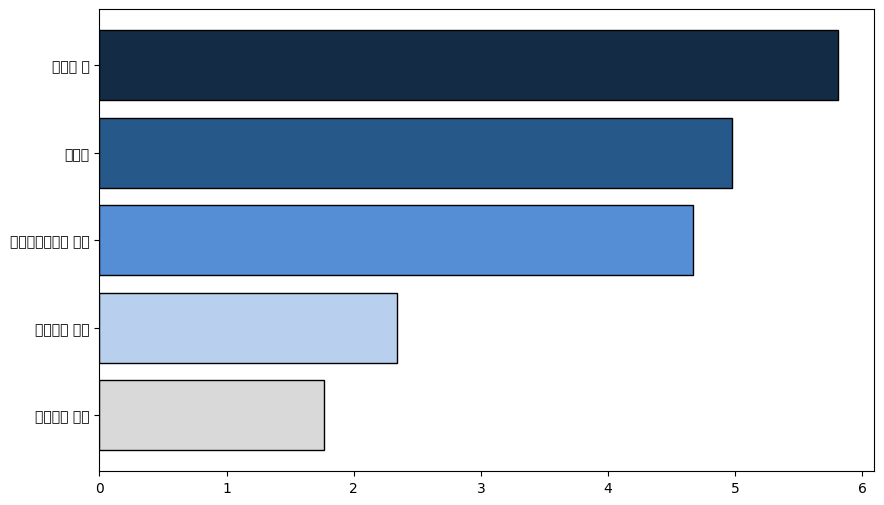

In [134]:
import matplotlib.pyplot as plt
import pandas as pd

# 특징 중요도 데이터프레임 생성
feature_importance = pd.DataFrame({
    'Feature': ['경로당 수', '인구수', '과속단속카메라 개수', '복지시설 개수', '보호구역 개수'],
    'Importance': [5.806496, 4.973868, 4.670472, 2.343921, 1.762874]
})

# 중요도 기준으로 내림차순 정렬
feature_importance = feature_importance.sort_values(by='Importance', ascending=True)

# 그래프 생성
colors = ['#D9D9D9', '#B8D0ED', '#558ED5', '#26588A', '#132B45']  # 각 막대의 색상 설정
plt.figure(figsize=(10, 6))
bars = plt.barh(feature_importance['Feature'], feature_importance['Importance'], color=colors, edgecolor='black')

# 그래프에 값 표시
#for bar in bars:
    #width = bar.get_width()
    #plt.text(width + 0.1, bar.get_y() + bar.get_height() / 2, f'{width:.2f}', va='center', fontsize=12)


# 그래프 표시
plt.show()


In [107]:
from autogluon.tabular import TabularPredictor

train_data = ...

# 모델 학습
predictor = TabularPredictor(label='종속변수').fit(train_data)

# 특징 중요도 추출
feature_importance = predictor.feature_importance()

# 결과 출력
print(feature_importance)

No path specified. Models will be saved in: "AutogluonModels/ag-20241209_123857"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
Memory Avail:       10.82 GB / 12.67 GB (85.4%)
Disk Space Avail:   71.13 GB / 107.72 GB (66.0%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets. Defaulting to `'medium'`...
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='experimental' : New in v1.2: Pre-trained foundation model + parallel fits. The absolute best accuracy without consideration for inference speed. Does not support GPU.
	presets='best'         : Maximize accuracy. Recommended for most users. Use in competitions 

AssertionError: train_data is required to be a pandas DataFrame, but was instead: <class 'ellipsis'>

In [57]:
# 7. 모델 성능 평가
performance = predictor.evaluate(train_data)

# 8. 주요 성능 지표 출력
print("\n=== 모델 성능 평가 ===")
for metric, value in performance.items():
    print(f"{metric}: {value}")


=== 모델 성능 평가 ===
root_mean_squared_error: -8.495990119441695
mean_squared_error: -72.1818481096509
mean_absolute_error: -5.871398444526139
r2: 0.6536030831020705
pearsonr: 0.8369441907408084
median_absolute_error: -4.398003387451176


In [83]:
print(train_data.describe())  # 데이터 통계 요약
print(train_data.isnull().sum())  # 결측값 확인

               인구수        경로당 수      복지시설 개수      보호구역 개수   과속단속카메라 개수  \
count  3550.000000  3550.000000  3550.000000  3550.000000  3550.000000   
mean   2876.575493     1.982254     1.322254     0.233803     3.179718   
std    2285.336045     1.776453     1.357212     0.515727     3.925315   
min       0.000000     0.000000     1.000000     0.000000     0.000000   
25%     857.250000     0.000000     1.000000     0.000000     0.000000   
50%    2542.000000     2.000000     1.000000     0.000000     2.000000   
75%    4605.750000     3.000000     1.000000     0.000000     5.000000   
max    9226.000000     8.000000    26.000000     3.000000    29.000000   

              EPDO          사고수     EPDO 정규화      사고수 정규화         종속변수  \
count  3550.000000  3550.000000  3554.000000  3554.000000  3550.000000   
mean     68.782254     1.229014     0.144338     0.032519     0.066252   
std      71.672545     0.692676     0.150566     0.099073     0.088761   
min       0.000000     1.000000     0

In [89]:
print(train_data.isnull().sum())

시간단위              5
격자명               5
인구수               5
경로당 수             5
복지시설 개수           5
보호구역 개수           5
과속단속카메라 개수        5
EPDO              5
사고수               5
EPDO 정규화          1
사고수 정규화           1
종속변수              5
종속                0
Unnamed: 13    3555
EPDO.1         3553
사고수.1          3553
dtype: int64


In [86]:
# 독립변수 열 목록
independent_vars = ['인구수', '경로당 수', '복지시설 개수', '보호구역 개수', '과속단속카메라 개수']

# 독립변수 열에 결측값이 있는 행만 삭제
train_data = train_data.dropna(subset=independent_vars)

# 삭제 후 데이터 크기 확인
print(f"삭제 후 데이터 크기: {train_data.shape}")
print(train_data.isnull().sum())  # 결측값 확인

삭제 후 데이터 크기: (3550, 16)
시간단위              0
격자명               0
인구수               0
경로당 수             0
복지시설 개수           0
보호구역 개수           0
과속단속카메라 개수        0
EPDO              0
사고수               0
EPDO 정규화          0
사고수 정규화           0
종속변수              0
종속                0
Unnamed: 13    3550
EPDO.1         3548
사고수.1          3548
dtype: int64


In [87]:
# 결측값 비율 확인
null_percentage = train_data.isnull().mean() * 100
print("각 열의 결측값 비율(%):")
print(null_percentage.sort_values(ascending=False))

각 열의 결측값 비율(%):
Unnamed: 13    100.000000
EPDO.1          99.943662
사고수.1           99.943662
시간단위             0.000000
격자명              0.000000
인구수              0.000000
경로당 수            0.000000
복지시설 개수          0.000000
보호구역 개수          0.000000
과속단속카메라 개수       0.000000
EPDO             0.000000
사고수              0.000000
EPDO 정규화         0.000000
사고수 정규화          0.000000
종속변수             0.000000
종속               0.000000
dtype: float64


In [65]:
# 수치형 변수: 평균값으로 대체
numerical_cols = train_data.select_dtypes(include=['float64', 'int64']).columns
train_data[numerical_cols] = train_data[numerical_cols].fillna(train_data[numerical_cols].mean())

categorical_cols = train_data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    train_data[col].fillna(train_data[col].mode()[0], inplace=True)


<ipython-input-65-a59f3e0e4766>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data[col].fillna(train_data[col].mode()[0], inplace=True)


In [92]:
print("결측값 처리 후:")
print(train_data.isnull().sum())
print(train_data.describe())

결측값 처리 후:
시간단위              0
격자명               0
인구수               0
경로당 수             0
복지시설 개수           0
보호구역 개수           0
과속단속카메라 개수        0
EPDO              0
사고수               0
EPDO 정규화          0
사고수 정규화           0
종속변수              0
종속                0
Unnamed: 13    3550
EPDO.1         3548
사고수.1          3548
dtype: int64
               인구수        경로당 수      복지시설 개수      보호구역 개수   과속단속카메라 개수  \
count  3550.000000  3550.000000  3550.000000  3550.000000  3550.000000   
mean   2876.575493     1.982254     1.322254     0.233803     3.179718   
std    2285.336045     1.776453     1.357212     0.515727     3.925315   
min       0.000000     0.000000     1.000000     0.000000     0.000000   
25%     857.250000     0.000000     1.000000     0.000000     0.000000   
50%    2542.000000     2.000000     1.000000     0.000000     2.000000   
75%    4605.750000     3.000000     1.000000     0.000000     5.000000   
max    9226.000000     8.000000    26.000000     3.000000    29.0

In [78]:
print(f"결측값 처리 후 데이터 크기: {train_data.shape}")

결측값 처리 후 데이터 크기: (3550, 16)


In [113]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 실제값과 예측값 계산
y_true = train_data[target]
y_pred = predictor.predict(train_data[features])

# 지표 수동 계산
mse = mean_squared_error(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

print("\n=== 성능 지표 ===")
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R^2 Score: {r2}")


=== 성능 지표 ===
Mean Squared Error: 74.45244637430295
Mean Absolute Error: 6.011766366219858
R^2 Score: 0.642685895777024


In [80]:
print("train_data 정보:")
print(train_data.info())

print("\n종속 변수 데이터:")
print(train_data[target].head())

print("\n예측값 데이터:")
print(predictor.predict(train_data[features].head()))

train_data 정보:
<class 'pandas.core.frame.DataFrame'>
Index: 3550 entries, 0 to 3553
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   시간단위         3550 non-null   object 
 1   격자명          3550 non-null   object 
 2   인구수          3550 non-null   float64
 3   경로당 수        3550 non-null   float64
 4   복지시설 개수      3550 non-null   float64
 5   보호구역 개수      3550 non-null   float64
 6   과속단속카메라 개수   3550 non-null   float64
 7   EPDO         3550 non-null   float64
 8   사고수          3550 non-null   float64
 9   EPDO 정규화     3550 non-null   float64
 10  사고수 정규화      3550 non-null   float64
 11  종속변수         3550 non-null   float64
 12  종속           3550 non-null   float64
 13  Unnamed: 13  0 non-null      float64
 14  EPDO.1       2 non-null      float64
 15  사고수.1        2 non-null      float64
dtypes: float64(14), object(2)
memory usage: 471.5+ KB
None

종속 변수 데이터:
0     5.4
1    28.2
2    27.0
3    38.6
4    12.2
Name: